<a href="https://colab.research.google.com/github/Aaron-coderson/Categorizing-Cyber-Attacks/blob/main/draft/newCyberPaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up

In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.graph_objects as go

In [5]:
# clone self to acess data
!git clone https://github.com/Aaron-coderson/Categorizing-Cyber-Attacks.git


Cloning into 'Categorizing-Cyber-Attacks'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 5), reused 13 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 5.00 MiB | 14.35 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [7]:
!ls

Categorizing-Cyber-Attacks  sample_data


In [9]:
# import cissm data to df
df = pd.read_csv('Categorizing-Cyber-Attacks/draft/data/cissm_data.csv', encoding='latin-1')

In [10]:
# save copy for backup
original_df = df

# Data Processing

In [11]:
## event_counts stores cyber event types over all indsustries
event_counts = df.groupby('event_type').size().reset_index(name='counts')
event_counts

event_type  counts
0    Disruptive    4360
1    Exploitive    7000
2         Mixed    2500
3  Undetermined     181

In [12]:
## motive_counts stores motive over all industries
motive_counts = df.groupby('motive').size().reset_index(name='counts')
motive_counts

motive  counts
0                    Financial    8034
1         Industrial-Espionage      94
2              Personal Attack      93
3          Political-Espionage     679
4                      Protest    1680
5            Protest,Financial       1
6  Protest;Political-Espionage       1
7                     Sabotage     340
8                 Undetermined    3119

In [13]:
## actor_counts stores actor types over all industries
actor_counts = df.groupby('actor_type').size().reset_index(name='counts')
actor_counts

actor_type  counts
0      Criminal   10676
1    Hacktivist    1909
2     Hacktvist      17
3      Hobbyist     191
4  Nation-State     803
5     Terrorist      30
6  Undetermined     415

In [14]:
## monthly counts stores month, event_type, and industry
monthly_counts = df.groupby(['month', 'event_type', 'industry']).size().reset_index(name='count')

In [15]:
## dfEventType stores occurrences of each event type within each industry
dfEventType = df.groupby('industry')['event_type'].value_counts().unstack(fill_value=0)

# Rename columns for clarity
dfEventType = dfEventType.rename(columns={
    'Undetermined': 'undetermined_eventType_count',
    'Mixed': 'mixed_eventType_count',
    'Exploitive': 'exploititive_eventType_count',
    'Disruptive': 'disruptive_eventType_count'
})

# Calculate total counts for each industry
dfEventType['industry_counts'] = dfEventType.sum(axis=1)

# Reset index to make 'industry' a regular column
dfEventType = dfEventType.reset_index()

# Sort dfEventType by industry_counts in ascending order
dfEventType = dfEventType.sort_values(by='industry_counts', ascending=True)
dfEventType.head()

event_type                                    industry  \
12                                              Medusa   
2           Agriculture, Forestry, Fishing and Hunting   
10             Management of Companies and Enterprises   
8                      Health Care and Social Services   
4                                         Construction   

event_type  disruptive_eventType_count  exploititive_eventType_count  \
12                                   0                             0   
2                                    6                             3   
10                                   5                             8   
8                                    4                            11   
4                                    9                            10   

event_type  mixed_eventType_count  undetermined_eventType_count  \
12                              1                             0   
2                               9                             0   
10                              7                             0   
8                              11                             1   
4                              27                             1   

event_type  industry_counts  
12                        1  
2                        18  
10                       20  
8                        27  
4                        47

In [16]:
## dfActorType stores occurences of each actor_type within each industry
dfActorType = df.groupby('industry')['actor_type'].value_counts().unstack(fill_value=0)
dfActorType['industry_counts'] = dfActorType.sum(axis=1)
dfActorType = dfActorType.reset_index()
dfActorType = dfActorType.sort_values(by='industry_counts', ascending=True)
dfActorType.head()

actor_type                                    industry  Criminal  Hacktivist  \
12                                              Medusa         1           0   
2           Agriculture, Forestry, Fishing and Hunting        13           4   
10             Management of Companies and Enterprises        16           2   
8                      Health Care and Social Services        27           0   
4                                         Construction        39           7   

actor_type  Hacktvist  Hobbyist  Nation-State  Terrorist  Undetermined  \
12                  0         0             0          0             0   
2                   0         0             1          0             0   
10                  0         0             2          0             0   
8                   0         0             0          0             0   
4                   0         1             0          0             0   

actor_type  industry_counts  
12                        1  
2                        18  
10                       20  
8                        27  
4                        47

In [17]:
## dfMotive stores occurrences of each motive type within each industry
dfMotive = df.groupby('industry')['motive'].value_counts().unstack(fill_value=0)
dfMotive['industry_counts'] = dfMotive.sum(axis=1)
dfMotive = dfMotive.reset_index()
dfMotive = dfMotive.sort_values(by='industry_counts', ascending=True)
dfMotive.rename(columns = {'industry': 'Sector Title', 'Undetermined': 'Undetermined Motive'}, inplace = True)
dfMotive.head()

motive                                Sector Title  Financial  \
12                                          Medusa          1   
2       Agriculture, Forestry, Fishing and Hunting         10   
10         Management of Companies and Enterprises         13   
8                  Health Care and Social Services         27   
4                                     Construction         34   

motive  Industrial-Espionage  Personal Attack  Political-Espionage  Protest  \
12                         0                0                    0        0   
2                          0                0                    0        4   
10                         0                0                    1        2   
8                          0                0                    0        0   
4                          0                0                    0        8   

motive  Protest,Financial  Protest;Political-Espionage  Sabotage  \
12                      0                            0         0   
2                       0                            0         1   
10                      0                            0         1   
8                       0                            0         0   
4                       0                            0         0   

motive  Undetermined Motive  industry_counts  
12                        0                1  
2                         3               18  
10                        3               20  
8                         0               27  
4                         5               47

In [18]:
## combine dfEventType, dfActorType, and dfMotive type into final merged df

dfActorType = dfActorType.sort_values(by='industry_counts', ascending=True)
dfEventType = dfEventType.sort_values(by='industry_counts', ascending=True)
dfMotive = dfMotive.sort_values(by='industry_counts', ascending=True)
dfActorType.rename(columns = {'industry': 'Sector Title'}, inplace = True)
dfEventType.rename(columns = {'industry': 'Sector Title'}, inplace = True)
dfMotive.rename(columns = {'industry': 'Sector Title'}, inplace = True)

merged_df = pd.merge(dfEventType, dfActorType, on='Sector Title', how='outer')
final_merged_df = pd.merge(merged_df, dfMotive, on='Sector Title', how='outer')
final_merged_df = final_merged_df.sort_values(by='industry_counts_y', ascending=True)
final_merged_df.head()

Sector Title  disruptive_eventType_count  \
12                                      Medusa                           0   
2   Agriculture, Forestry, Fishing and Hunting                           6   
10     Management of Companies and Enterprises                           5   
8              Health Care and Social Services                           4   
4                                 Construction                           9   

    exploititive_eventType_count  mixed_eventType_count  \
12                             0                      1   
2                              3                      9   
10                             8                      7   
8                             11                     11   
4                             10                     27   

    undetermined_eventType_count  industry_counts_x  Criminal  Hacktivist  \
12                             0                  1         1           0   
2                              0                 18        13           4   
10                             0                 20        16           2   
8                              1                 27        27           0   
4                              1                 47        39           7   

    Hacktvist  Hobbyist  ...  Financial  Industrial-Espionage  \
12          0         0  ...          1                     0   
2           0         0  ...         10                     0   
10          0         0  ...         13                     0   
8           0         0  ...         27                     0   
4           0         1  ...         34                     0   

    Personal Attack  Political-Espionage  Protest  Protest,Financial  \
12                0                    0        0                  0   
2                 0                    0        4                  0   
10                0                    1        2                  0   
8                 0                    0        0                  0   
4                 0                    0        8                  0   

    Protest;Political-Espionage  Sabotage  Undetermined Motive  \
12                            0         0                    0   
2                             0         1                    3   
10                            0         1                    3   
8                             0         0                    0   
4                             0         0                    5   

    industry_counts  
12                1  
2                18  
10               20  
8                27  
4                47  

[5 rows x 24 columns]

In [19]:
## create lists of values for certain columns for use throughout
listEvent = [ 'disruptive_count',
 'exploitive_count',
 'mixed_count',
 'undetermined_count']

listActor = ['Criminal',
 'Hacktivist',
 'Hobbyist',
 'Nation-State',
 'Terrorist',
 'Undetermined']

listMotive =  ['Financial',
 'Industrial-Espionage',
 'Personal Attack',
 'Political-Espionage',
 'Protest',
 'Protest,Financial',
 'Protest;Political-Espionage',
 'Sabotage',
 'Undetermined Motive']

industry_types = [ "Agriculture, Forestry, Fishing and Hunting"
 "Mining",
 "Utilities",
 "Construction",
 "Manufacturing",
 "Wholesale Trade",
 "Retail Trade",
 "Transportation and Warehousing",
 "Information",
 "Finance and Insurance",
 "Real Estate Rental and Leasing",
 "Professional, Scientific, and Technical Services",
 "Management of Companies and Enterprises",
 "Administrative and Support and Waste Management and Remediation Services",
 "Educational Services",
 "Health Care and Social Assistance",
 "Arts, Entertainment, and Recreation",
 "Accommodation and Food Services",
 "Other Services (except Public Administration)",
 "Public Administration"]


In [20]:
## create industryDF which stores event_date, industry, and counts
## create timeDF which stores event_date and counts

df['event_date'] = pd.to_datetime(df['event_date'], format = 'mixed')

event_types = ['Undetermined', 'Disruptive', 'Exploitive', 'Mixed']
filtered_df = df[df['event_type'].isin(event_types)]

timeDf = filtered_df.groupby([pd.Grouper(key='event_date', freq='M')]).size().reset_index(name='counts')

# Convert event_date to datetime
df['event_date'] = pd.to_datetime(df['event_date'])

# Filter rows based on event_type values
event_types = ['Undetermined', 'Disruptive', 'Exploitive', 'Mixed']
filtered_df = df[df['event_type'].isin(event_types)]

# Group by year, month, and event_type, then count occurrences
grouped_df = filtered_df.groupby([pd.Grouper(key='event_date', freq='M'), 'event_type']).size().reset_index(name='counts')


filtered_df = df[df['industry'].isin(industry_types)]

# Group by year, month, and event_type, then count occurrences
industryDf = filtered_df.groupby([pd.Grouper(key='event_date', freq='ME'), 'industry']).size().reset_index(name='counts')

<ipython-input-20-2cdf16e3cd52>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  timeDf = filtered_df.groupby([pd.Grouper(key='event_date', freq='M')]).size().reset_index(name='counts')
<ipython-input-20-2cdf16e3cd52>:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped_df = filtered_df.groupby([pd.Grouper(key='event_date', freq='M'), 'event_type']).size().reset_index(name='counts')


In [21]:
# df_health contains only the data of attacks on the Health Care and Social Assistance industr
df_health = df[df['industry'] == 'Health Care and Social Assistance']

In [22]:
# df_publicAdmin contains only data of attacks on the Public Adminsitration Industry
df_publicAdmin = df[df['industry'] == 'Public Administration']

# Analysis Over All Industries

# Distribution of Cyber Events over All Industries


In [23]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.bar(df, y=df['industry'].value_counts().index, x=df['industry'].value_counts().values,
             title='Distribution of Cyber Attacks Across Industries')

fig.update_layout(
    width=800,
    height=600,
    yaxis_title="Industry",
    xaxis_title="Number of Attacks"

)

fig.update_layout(font=dict(size=14))
fig.show()
# this code graphs the number of cyber attacks per industry using plotly

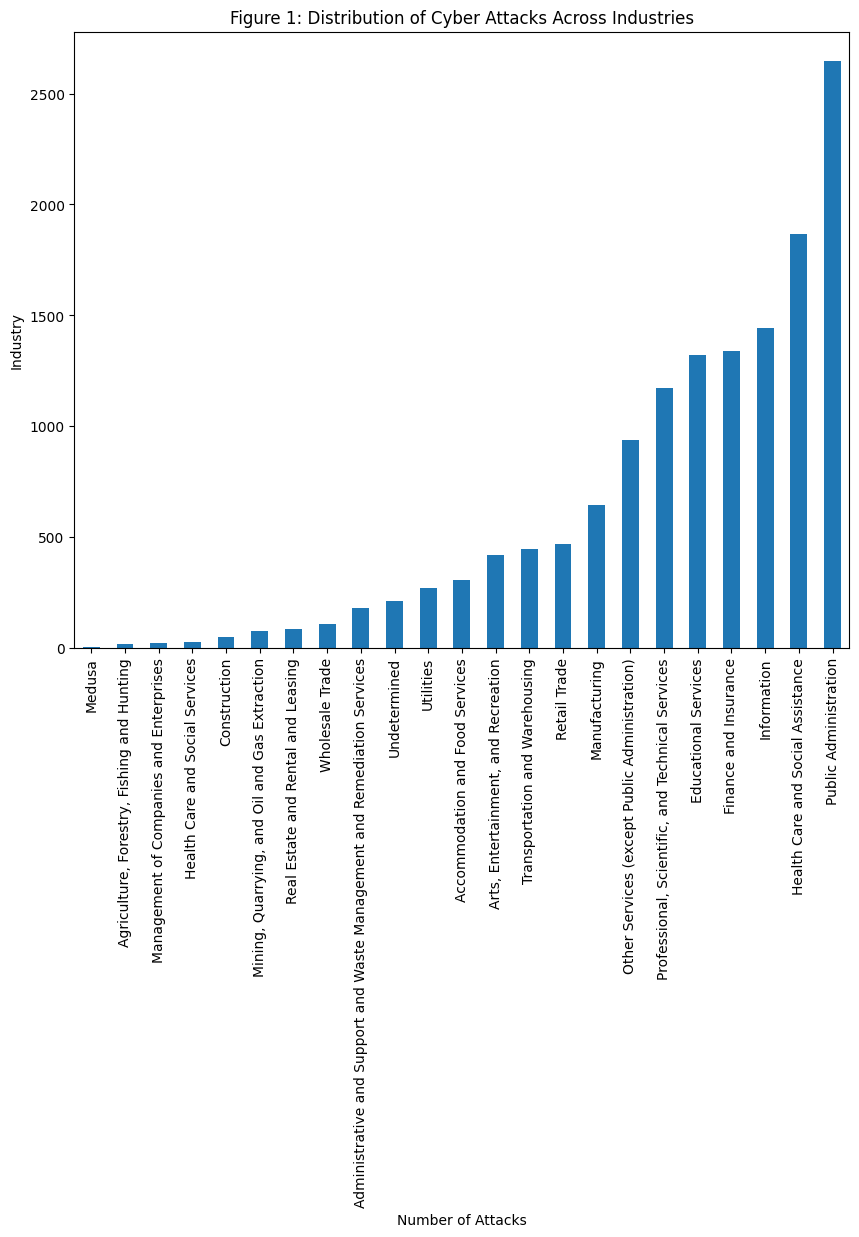

In [24]:
industry_counts = df['industry'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(10, 8))
industry_counts.plot(kind='bar')
plt.xlabel('Number of Attacks')
plt.ylabel('Industry')
_ = plt.title('Figure 1: Distribution of Cyber Attacks Across Industries')
# this code graphs the number of cyber attacks per industry using Matplotlib

# Cyber Event Types over All Industries

In [25]:
fig = px.bar(event_counts,
             y='event_type',
             x='counts',
             orientation='h',
             color_discrete_sequence=px.colors.qualitative.Dark2,
             labels={'event_type': 'Event Type', 'counts': 'Number of Attacks'},
             title='Distribution of Cyber Attacks by Event Type Across All Industries')

fig.update_layout(
    yaxis_title='Event Type',
    xaxis_title='Number of Attacks',
    showlegend=False,
    plot_bgcolor='white'
)
fig.update_layout(font=dict(size=14))
fig.show()
# this code graphs the distribution of cyber attack event types across all industries using plotly

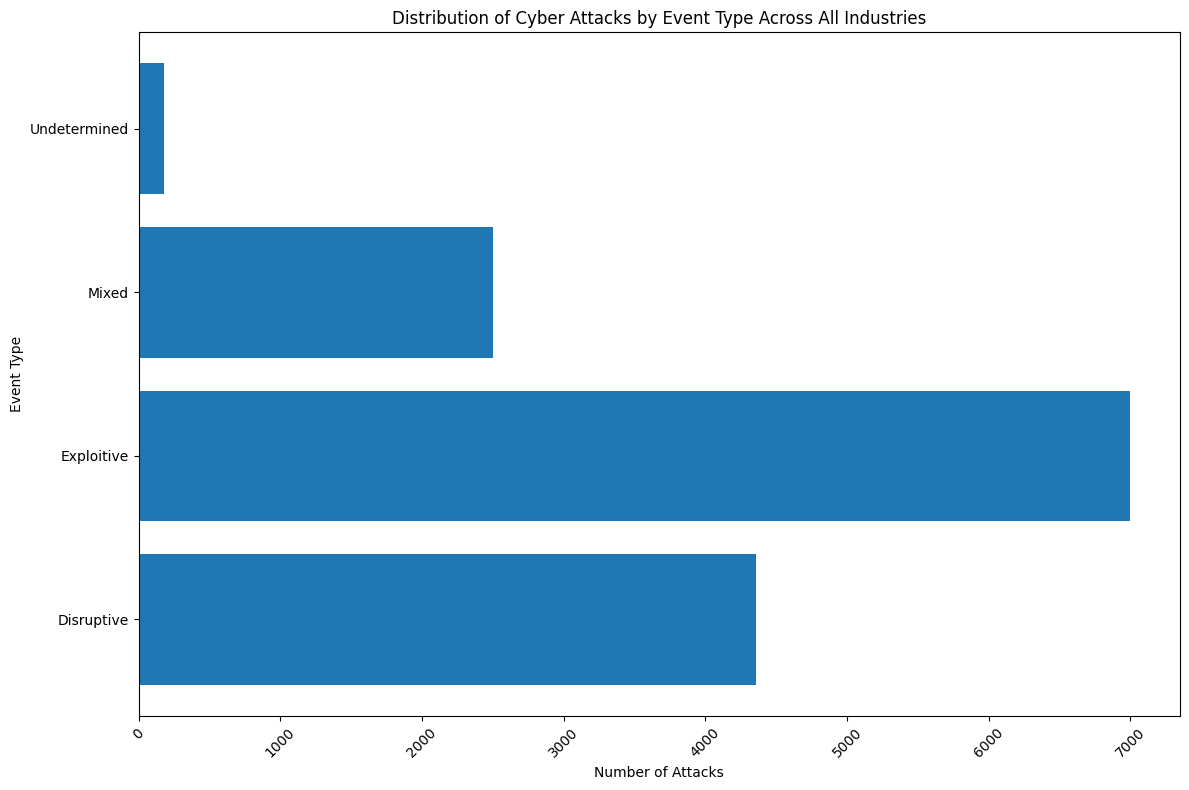

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(event_counts['event_type'], event_counts['counts'])

ax.set_xlabel('Number of Attacks')
ax.set_ylabel('Event Type')
ax.set_title('Distribution of Cyber Attacks by Event Type Across All Industries')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# this code graphs the distribution of cyber attack event types across all industries using Matplotlib

In [27]:
fig = px.bar(dfEventType, y = "Sector Title",
             x = ["disruptive_eventType_count", "exploititive_eventType_count",
                  "mixed_eventType_count", "undetermined_eventType_count"],
                  title = "Distribution of Cyber Events and Types Across Industries" )
fig.update_layout(font=dict(size=14))
fig.show()
# graph cyber events across all industry as well as coloring by event-type

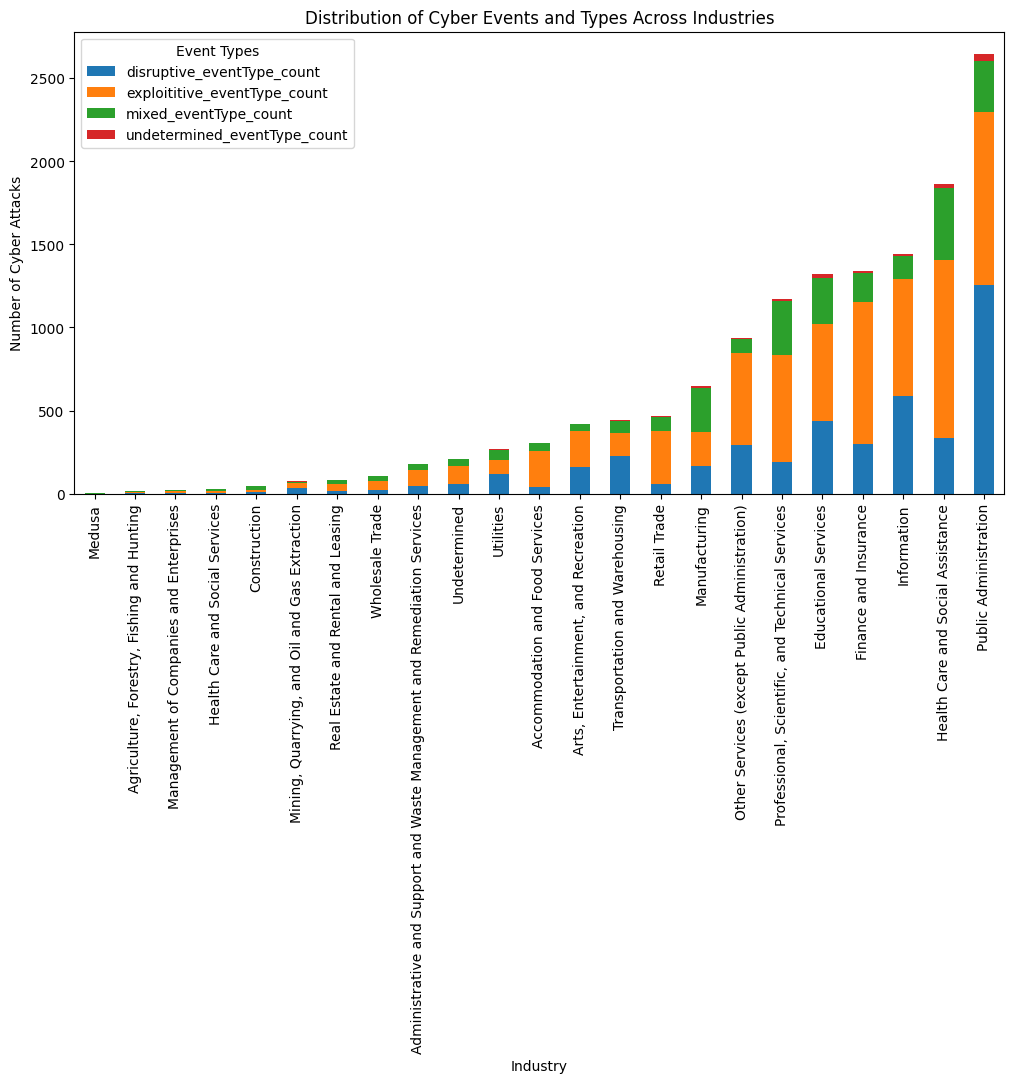

In [28]:
dfEventType[['disruptive_eventType_count', 'exploititive_eventType_count', 'mixed_eventType_count', 'undetermined_eventType_count']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Cyber Events and Types Across Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Cyber Attacks')
plt.xticks(range(len(dfEventType)), dfEventType['Sector Title'], rotation=90)
_ = plt.legend(title='Event Types')
#plt.show()

In [29]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
    z=dfEventType[["disruptive_eventType_count", "exploititive_eventType_count", "mixed_eventType_count", "undetermined_eventType_count"]].values,
    x=["disruptive_eventType_count", "exploititive_eventType_count", "mixed_eventType_count", "undetermined_eventType_count"],
    y=dfEventType["Sector Title"], colorscale="tempo"
   ))

fig.update_layout(title='Heatmap of Event Types by Industry')
fig.update_layout(font=dict(size=14))
fig.show()
# graph heatmap of industry vs event_type for cyber events

In [30]:
fig = px.pie(event_counts, values='counts', names='event_type', title = 'Pie Chart of Cyber Event Types')
fig.update_layout(font=dict(size=14))
fig.show()

# Motives of Cyber Event Types over all Industries

In [31]:
fig = px.pie(motive_counts, values='counts', names='motive', title = 'Pie Chart of Motives')
fig.update_layout(font=dict(size=14))
fig.show()
# pie chart of motives over all industries

In [32]:
fig = px.bar(dfMotive, y = "Sector Title",
             x = listMotive,
                  title = "Distribution of Motive Types Across Industries" )

fig.show()
# graph cyber events across all industry as well as coloring by event-type

In [33]:
fig = go.Figure(data=go.Heatmap(
    z=final_merged_df[listMotive].values,
    x=listMotive,
    y=final_merged_df["Sector Title"], colorscale="tempo"
   ))

fig.update_layout(title='Heatmap of Motive Types by Sector Title')

fig.show()
# graph heatmap of industry vs event_type for cyber events

In [34]:
fig = px.bar(motive_counts, y = 'motive',
             x = 'counts',
             orientation = 'h',
             color_discrete_sequence=px.colors.qualitative.Dark2,
             labels={'motive': 'Motive Counts', 'counts': 'Number of Attacks'},
             title='Distribution of Cyber Attacks by Motive Type Across All Industries')

fig.update_layout(
    yaxis_title='Event Type',
    xaxis_title='Number of Attacks',
    showlegend=False,
    plot_bgcolor='white'
)

fig.update_layout(font=dict(size=14))
fig.show()
# this code graphs the distribution of cyber attack actor types across all industries

# Actor Types of Cyber Events over all Industries

In [35]:
fig = px.pie(actor_counts, values='counts', names='actor_type', title = 'Pie Chart of Actor Types')
fig.update_layout(font=dict(size=14))
fig.show()

In [36]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
    z=dfActorType[listActor].values,
    x=listActor,
    y=dfActorType["Sector Title"], colorscale="tempo"
   ))

fig.update_layout(title='Heatmap of Actor Types by Industry')

fig.show()
# graph heatmap of industry vs event_type for cyber events

In [37]:
fig = px.bar(dfActorType, y = "Sector Title",
             x = listActor,
                  title = "Distribution of Actor Types Across Industries" )

fig.show()
# graph cyber events across all industry as well as coloring by actor type

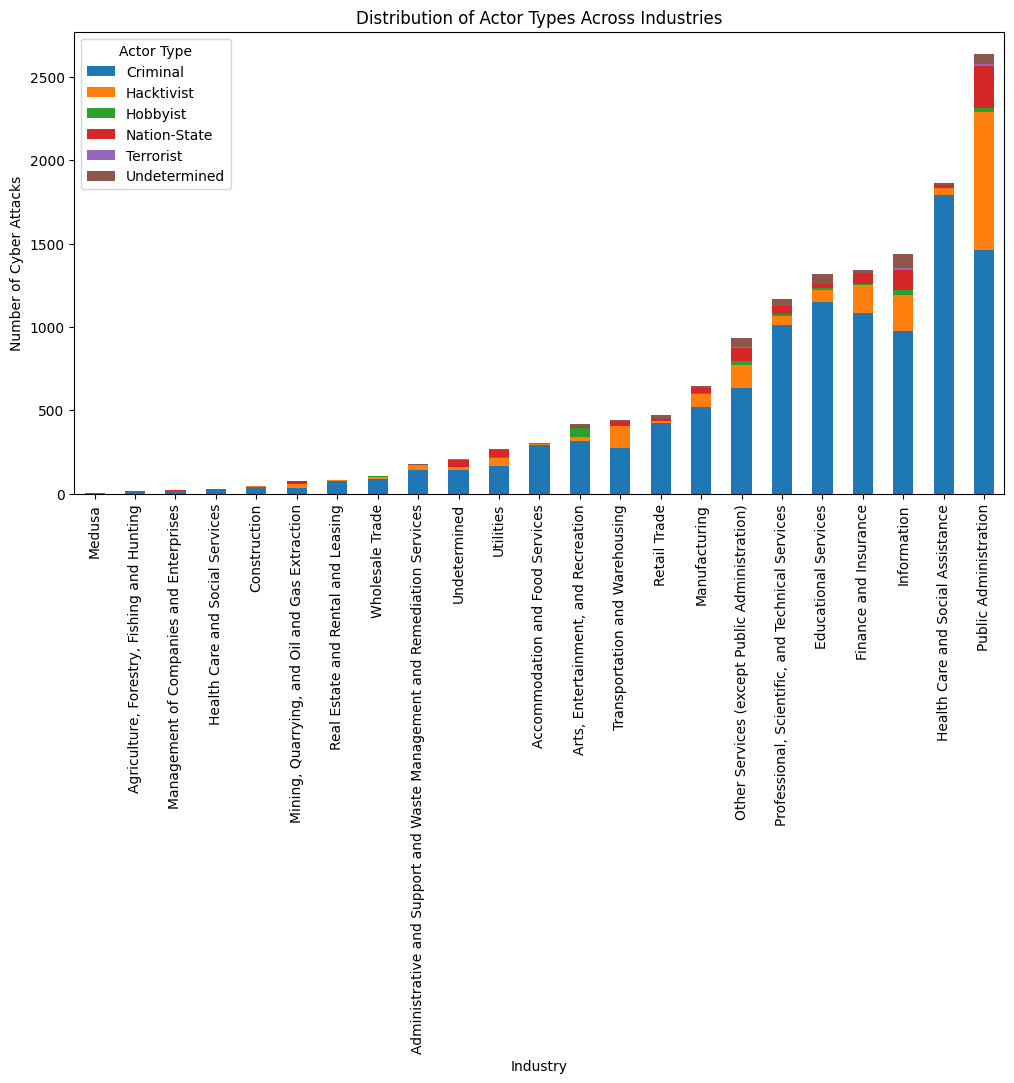

In [38]:
import matplotlib.pyplot as plt
import pandas as pd


dfActorType[['Criminal', 'Hacktivist', 'Hobbyist', 'Nation-State', 'Terrorist', 'Undetermined']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Actor Types Across Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Cyber Attacks')
plt.xticks(range(len(dfActorType)), dfActorType['Sector Title'], rotation=90)
_ = plt.legend(title='Actor Type')
#plt.show()

In [39]:
fig = px.bar(actor_counts, y = 'actor_type',
             x = 'counts',
             orientation = 'h',
             color_discrete_sequence=px.colors.qualitative.Dark2,
             labels={'actor_type': 'Actor Type', 'counts': 'Number of Attacks'},
             title='Distribution of Cyber Attacks by Actor Type Across All Industries')

fig.update_layout(
    yaxis_title='Event Type',
    xaxis_title='Number of Attacks',
    showlegend=False,
    plot_bgcolor='white'
)

fig.update_layout(font=dict(size=14))
fig.show()
# this code graphs the distribution of cyber attack actor types across all industries

# Visualizations Over Time

<ipython-input-40-3712b40e2cc3>:9: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



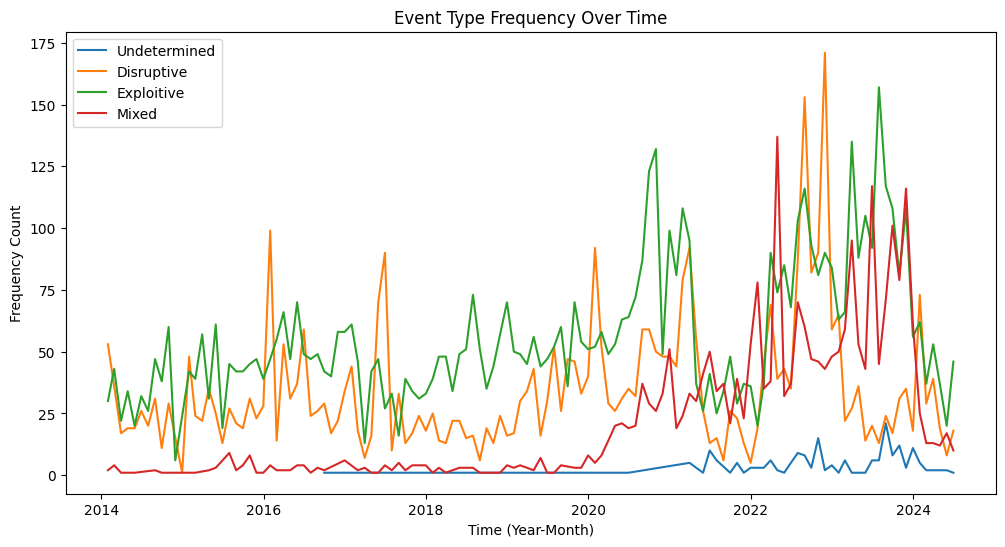

In [40]:
# Convert event_date to datetime
df['event_date'] = pd.to_datetime(df['event_date'], format = 'mixed')

# Filter rows based on event_type values
event_types = ['Undetermined', 'Disruptive', 'Exploitive', 'Mixed']
filtered_df = df[df['event_type'].isin(event_types)]

# Group by year, month, and event_type, then count occurrences
grouped_df = filtered_df.groupby([pd.Grouper(key='event_date', freq='M'), 'event_type']).size().reset_index(name='counts')

# Plot the data
plt.figure(figsize=(12, 6))

for event_type in event_types:
    subset_df = grouped_df[grouped_df['event_type'] == event_type]
    plt.plot(subset_df['event_date'], subset_df['counts'], label=event_type)

plt.xlabel('Time (Year-Month)')
plt.ylabel('Frequency Count')
plt.title('Event Type Frequency Over Time')
plt.legend()

plt.show()
# this code graphs each cyber event frequency over time in terms of month(s)

In [41]:
fig = px.line(grouped_df, x='event_date', y='counts', color='event_type', title='Event Type Frequency Over Time')

fig.update_xaxes(title_text='Time (Year-Month)')
fig.update_yaxes(title_text='Frequency Count')
fig.update_layout(font=dict(size=14))

fig.show()
# this code graphs each cyber event frequency over time in terms of month(s)

In [42]:
fig = px.line(timeDf, x='event_date', y='counts',  title='All Over Time')

fig.update_xaxes(title_text='Time (Year-Month)')
fig.update_yaxes(title_text='Frequency Count')

fig.update_layout(font=dict(size=14))
fig.show()
# this code graphs each cyber event frequency over time in terms of month(s)

In [43]:
from plotly.express import scatter
fig.update_layout(font=dict(size=14))
scatter(data_frame=grouped_df, x='event_date', y='counts', color='event_type', trendline='lowess', trendline_scope='trace')

In [44]:
fig = px.line(industryDf, x='event_date', y='counts', color='industry', title='Cyber Attacks over Time by Industry')

fig.update_xaxes(title_text='Time (Year-Month)')
fig.update_yaxes(title_text='Frequency Count')
fig.update_layout(font=dict(size=14))
fig.show()
# this code graphs each cyber event frequency over time in terms of month(s)

In [45]:
fig = px.bar(industryDf, x='event_date', y='counts', color='industry', title='Cyber Attacks over Time by Industry')
fig.update_layout(font=dict(size=14))
fig.show()

In [46]:
fig = px.bar(monthly_counts, x='month', y='count', color='industry', title='Cyber Attacks over Time by Industry')
fig.update_layout(font=dict(size=14))
fig.show()

# Visualization of Healthcare

In [47]:
event_counts = df_health.groupby('event_type').size().reset_index(name='counts')

fig = px.bar(event_counts,
             y='event_type',
             x='counts',
             orientation='h',
             color_discrete_sequence=px.colors.qualitative.Dark2,
             labels={'event_type': 'Event Type', 'count': 'Number of Attacks'},
             title='Distribution of Cyber Attacks by Event Type in Health Care and Social Assistance Cyber Events')

fig.update_layout(
    yaxis_title='Event Type',
    xaxis_title='Number of Attacks',
    showlegend=False,
    plot_bgcolor='white'
)

fig.show()
# graphs the distribution of cyber attacks by event type in the Health Care and Social Assistance Industry

# Visualization of Public Administration

In [48]:
import plotly.express as px

event_counts = df_publicAdmin.groupby('event_type').size().reset_index(name='counts')

fig = px.bar(event_counts,
             y='event_type',
             x='counts',
             orientation='h',
             color_discrete_sequence=px.colors.qualitative.Dark2,
             labels={'event_type': 'Event Type', 'count': 'Number of Attacks'},
             title='Distribution of Cyber Attacks by Event Type in Public Administration Cyber Events')

fig.update_layout(
    yaxis_title='Event Type',
    xaxis_title='Number of Attacks',
    showlegend=False,
    plot_bgcolor='white'
)

fig.show()
#  graphs the distribution of cyber attacks by event type in the Public Administration Industry

# Stats

In [49]:
df_2023 = df[pd.to_datetime(df['event_date']).dt.year == 2023]

# Group by industry_code and count cyber events in 2024
cyber_events_2023 = df_2023.groupby('industry')['event_type'].count().reset_index()
cyber_events_2023.rename(columns={'event_type': 'cyber_events_2023'}, inplace=True)

In [50]:
df_2022 = df[pd.to_datetime(df['event_date']).dt.year == 2022]
cyber_events_2022 = df_2022.groupby('industry')['event_type'].count().reset_index()
cyber_events_2022.rename(columns = {'event_type': 'cyber_events_2022'}, inplace=True)
cyber_events_2022.rename(columns = {'industry': 'Sector Title'}, inplace = True)

In [51]:
df_2021 = df[pd.to_datetime(df['event_date']).dt.year == 2021]
cyber_events_2021 = df_2021.groupby('industry')['event_type'].count().reset_index()
cyber_events_2021.rename(columns = {'event_type': 'cyber_events_2021'}, inplace=True)
cyber_events_2021.rename(columns = {'industry': 'Sector Title'}, inplace = True)

In [52]:
df_2020 = df[pd.to_datetime(df['event_date']).dt.year == 2020]
cyber_events_2020 = df_2020.groupby('industry')['event_type'].count().reset_index()
cyber_events_2020.rename(columns = {'event_type': 'cyber_events_2020'}, inplace=True)
cyber_events_2020.rename(columns = {'industry': 'Sector Title'}, inplace = True)

In [53]:
df_2020.describe()

event_date    year        month  industry_code
count                           1747  1747.0  1747.000000    1747.000000
mean   2020-07-21 08:12:05.357756160  2020.0     7.136806      64.031483
min              2020-01-02 00:00:00  2020.0     1.000000      11.000000
25%              2020-04-23 00:00:00  2020.0     4.000000      52.000000
50%              2020-08-11 00:00:00  2020.0     8.000000      61.000000
75%              2020-10-16 12:00:00  2020.0    10.000000      81.000000
max              2020-12-31 00:00:00  2020.0    12.000000      99.000000
std                              NaN     0.0     3.480950      17.574115

In [54]:
df_2021.describe()

event_date    year        month  industry_code
count                           1430  1430.0  1430.000000    1430.000000
mean   2021-05-31 12:44:18.461538304  2021.0     5.497203      61.146154
min              2021-01-01 00:00:00  2021.0     1.000000      11.000000
25%              2021-03-01 00:00:00  2021.0     3.000000      51.000000
50%              2021-05-04 00:00:00  2021.0     5.000000      61.000000
75%              2021-09-02 00:00:00  2021.0     9.000000      62.000000
max              2021-12-31 00:00:00  2021.0    12.000000      99.000000
std                              NaN     0.0     3.484595      18.113600

In [55]:
df_2022.describe()

event_date    year        month  industry_code
count                           2562  2562.0  2562.000000    2562.000000
mean   2022-07-20 08:06:44.683840768  2022.0     7.134660      60.137783
min              2022-01-01 00:00:00  2022.0     1.000000      11.000000
25%              2022-04-24 00:00:00  2022.0     4.000000      51.000000
50%              2022-08-01 12:00:00  2022.0     8.000000      54.000000
75%              2022-10-11 18:00:00  2022.0    10.000000      72.000000
max              2022-12-31 00:00:00  2022.0    12.000000      99.000000
std                              NaN     0.0     3.220792      20.383998

In [56]:
df_2023.describe()

event_date         year        month  industry_code
count                           2464  2464.000000  2464.000000    2464.000000
mean   2023-07-06 03:29:13.246753280  2023.000812     6.644886      59.468750
min              2023-01-01 00:00:00  2023.000000     1.000000      11.000000
25%              2023-04-04 18:00:00  2023.000000     4.000000      52.000000
50%              2023-07-11 00:00:00  2023.000000     7.000000      56.000000
75%              2023-09-30 00:00:00  2023.000000     9.000000      62.000000
max              2023-12-31 00:00:00  2024.000000    12.000000      99.000000
std                              NaN     0.028484     3.335623      17.448394

In [57]:
merged_df.describe()

disruptive_eventType_count  exploititive_eventType_count  \
count                   23.000000                     23.000000   
mean                   189.565217                    304.347826   
std                    280.617635                    349.814835   
min                      0.000000                      0.000000   
25%                     20.000000                     35.000000   
50%                     57.000000                    136.000000   
75%                    260.000000                    569.000000   
max                   1253.000000                   1070.000000   

       mixed_eventType_count  undetermined_eventType_count  industry_counts_x  \
count              23.000000                     23.000000          23.000000   
mean              108.695652                      7.869565         610.478261   
std               125.432138                     10.528336         709.142496   
min                 1.000000                      0.000000           1.000000   
25%                27.500000                      1.000000          78.500000   
50%                43.000000                      4.000000         306.000000   
75%               155.500000                      9.000000        1053.500000   
max               436.000000                     44.000000        2648.000000   

          Criminal  Hacktivist  Hacktvist   Hobbyist  Nation-State  Terrorist  \
count    23.000000   23.000000  23.000000  23.000000     23.000000  23.000000   
mean    464.173913   83.000000   0.739130   8.304348     34.913043   1.304348   
std     525.161850  173.248114   1.711389  13.586206     56.552400   3.363369   
min       1.000000    0.000000   0.000000   0.000000      0.000000   0.000000   
25%      57.000000    7.500000   0.000000   0.000000      1.500000   0.000000   
50%     272.000000   23.000000   0.000000   2.000000     14.000000   0.000000   
75%     804.500000   73.000000   1.000000   9.500000     44.000000   0.500000   
max    1794.000000  830.000000   8.000000  55.000000    252.000000  14.000000   

       Undetermined  industry_counts_y  
count     23.000000          23.000000  
mean      18.043478         610.478261  
std       25.180220         709.142496  
min        0.000000           1.000000  
25%        1.000000          78.500000  
50%        5.000000         306.000000  
75%       19.000000        1053.500000  
max       84.000000        2648.000000

# Country

# Setting up for Gini Coefficient

In [59]:
## gini coefficient
## data: https://www.kaggle.com/datasets/willianoliveiragibin/gini-coefficient-after-tax?resource=download
giniDf = pd.read_csv('gini.csv', encoding='latin-1')
giniDf2 = pd.read_csv('gini_by_country.csv', encoding='latin-1')

FileNotFoundError: [Errno 2] No such file or directory: 'gini.csv'

In [60]:
giniDf2

NameError: name 'giniDf2' is not defined

In [61]:
actorStateCts = df.groupby('actor_country').size().reset_index(name='counts')
actorStateCts.sort_values(by='counts', ascending=False, inplace=True)
actorStateCts

actor_country  counts
74                                 Undetermined   10597
60                           Russian Federation    1847
16                                        China     171
38  Korea (the Democratic People's Republic of)     160
77                     United States of America     142
..                                          ...     ...
66                                    Sri Lanka       1
55                                         Peru       1
63                                 Sierra Leone       1
25                                        Ghana       1
0                                   Afghanistan       1

[82 rows x 2 columns]

In [62]:
fig = px.bar(actorStateCts,
             y='actor_country',
             x='counts',
             orientation='h',
             color_discrete_sequence=px.colors.qualitative.Dark2,
             labels={'actor_country': 'Actor Country', 'counts': 'Number of Attacks'},
             title='Distribution of Cyber Attacks by Actor Country')

fig.update_layout(
    yaxis_title='Actor Country',
    xaxis_title='Number of Attacks',
    showlegend=False,
    plot_bgcolor='white'
)

fig.show()

In [63]:
actorStateCtsDrop = actorStateCts.drop(actorStateCts[actorStateCts['actor_country'] == 'Undetermined'].index)

In [64]:
actorStateCtsDrop

actor_country  counts
60                           Russian Federation    1847
16                                        China     171
38  Korea (the Democratic People's Republic of)     160
77                     United States of America     142
73                                      Ukraine     133
..                                          ...     ...
66                                    Sri Lanka       1
55                                         Peru       1
63                                 Sierra Leone       1
25                                        Ghana       1
0                                   Afghanistan       1

[81 rows x 2 columns]

In [65]:
fig = px.bar(actorStateCtsDrop,
             y='actor_country',
             x='counts',
             orientation='h',
             color_discrete_sequence=px.colors.qualitative.Dark2,
             labels={'actor_country': 'Actor Country', 'counts': 'Number of Attacks'},
             title='Distribution of Cyber Attacks by Actor Country')

fig.update_layout(
    yaxis_title='Actor Country',
    xaxis_title='Number of Attacks',
    showlegend=False,
    plot_bgcolor='white'
)

fig.show()

In [66]:
actor_country_year = df.groupby(['actor_country', df['event_date'].dt.year]).size().reset_index(name='cyber_events_count')
actor_country_year.rename(columns={'event_date': 'year'}, inplace=True)
actorCountryYr = actor_country_year
actorCountryYr

actor_country  year  cyber_events_count
0     Afghanistan  2014                   1
1         Albania  2014                   1
2         Algeria  2015                   9
3         Algeria  2016                   9
4         Algeria  2017                   3
..            ...   ...                 ...
252      Viet Nam  2020                   2
253      Viet Nam  2022                   1
254      Viet Nam  2023                   2
255         Yemen  2015                   2
256         Yemen  2023                   2

[257 rows x 3 columns]

In [67]:
# Merge actorCountryYr with giniDf based on country and year
actorCountryYr = pd.merge(actorCountryYr, giniDf, left_on=['actor_country', 'year'], right_on=['Country', 'Year'], how='left')

# Rename and drop columns as needed
actorCountryYr.rename(columns={'Gini coefficient': 'Gini Coefficient'}, inplace=True)


NameError: name 'giniDf' is not defined

In [68]:
# Create a copy to avoid SettingWithCopyWarning
actorCountryYr2 = actorCountryYr.copy()

# Function to find the closest year in giniDf
def find_closest_year(row):
    country = row['actor_country']
    year = row['year']
    country_data = giniDf[giniDf['Country'] == country]
    if not country_data.empty:
        available_years = country_data['Year'].values
        closest_year = max([y for y in available_years if y <= year], default=np.nan)
        if not pd.isna(closest_year):  # Check if closest year was found
            gini_value = country_data[country_data['Year'] == closest_year]['Gini coefficient'].iloc[0]
            return gini_value

    return np.nan  # Return NaN if no matching year is found

# Apply the function to find the Gini coefficient
actorCountryYr2['Gini Coefficient'] = actorCountryYr.apply(find_closest_year, axis=1)

# Print the updated dataframe
actorCountryYr2

NameError: name 'giniDf' is not defined

In [ ]:
# Find unique values in actorCountryYr2['actor_country']
actor_countries = actorCountryYr2['actor_country'].unique()

# Find unique values in giniDf['Country']
gini_countries = giniDf['Country'].unique()

# Find values in actor_countries that are not in gini_countries
missing_countries = set(actor_countries) - set(gini_countries)

# Print the missing countries
missing_countries

In [69]:
actorCountryYr3 = actorCountryYr2.replace(['Bolivia (Plurinational State of)'],'Bolivia')
actorCountryYr3 = actorCountryYr3.replace([ 'Iran (Islamic Republic of)','Islamic Republic of Iran'],'Iran')
actorCountryYr3 = actorCountryYr3.replace(['Korea (the Republic of)'],'South Korea')

In [ ]:
# Find unique values in actorCountryYr2['actor_country']
actor_countries = actorCountryYr2['actor_country'].unique()

# Find unique values in giniDf['Country']
gini_countries = giniDf2['country_name'].unique()

# Find values in actor_countries that are not in gini_countries
missing_countries = set(actor_countries) - set(gini_countries)

# Print the missing countries
missing_countries

{'Afghanistan',
 'Bolivia (Plurinational State of)',
 'Cambodia',
 'Cuba',
 'Egypt',
 'Iran (Islamic Republic of)',
 'Islamic Republic of Iran',
 "Korea (the Democratic People's Republic of)",
 'Korea (the Republic of)',
 'Kuwait',
 'Libya',
 'New Zealand',
 'Palestine, State of',
 'Saudi Arabia',
 'Turkey',
 'Undetermined',
 'United Kingdom of Great Britain and Northern Ireland',
 'United States of America',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam',
 'Yemen'}

In [ ]:
actorCountryYr2['Gini Coefficient'].notnull().sum()

163

In [ ]:
# Drop rows with NaN values in 'Gini Coefficient' column
actorCountryYr3 = actorCountryYr2.dropna(subset=['Gini Coefficient'])
actorCountryYr3.count()

actor_country         163
year                  163
cyber_events_count    163
Country                87
Year                   87
Gini Coefficient      163
dtype: int64

In [ ]:
actorCountryYr3

actor_country  year  cyber_events_count  Country    Year  \
1                 Albania  2014                   1  Albania  2014.0   
2                 Algeria  2015                   9      NaN     NaN   
3                 Algeria  2016                   9      NaN     NaN   
4                 Algeria  2017                   3      NaN     NaN   
5                 Armenia  2015                   1  Armenia  2015.0   
..                    ...   ...                 ...      ...     ...   
228  United Arab Emirates  2019                   4      NaN     NaN   
229  United Arab Emirates  2020                   1      NaN     NaN   
247            Uzbekistan  2019                   4      NaN     NaN   
255                 Yemen  2015                   2      NaN     NaN   
256                 Yemen  2023                   2      NaN     NaN   

     Gini Coefficient  
1            0.345989  
2            0.276157  
3            0.276157  
4            0.276157  
5            0.323568  
..                ...  
228          0.263990  
229          0.263990  
247          0.352610  
255          0.367071  
256          0.367071  

[163 rows x 6 columns]

In [ ]:
fig = px.scatter(actorCountryYr3, x="Gini Coefficient", y="cyber_events_count",
                 color="actor_country", hover_data=['year'],
                 title="Cyber Event Count vs. Gini Coefficient by Actor Country and Year")
fig.update_layout(font=dict(size=14))
fig.show()

In [ ]:
actorCountryYr3

actor_country  year  cyber_events_count  Country    Year  \
1                 Albania  2014                   1  Albania  2014.0   
2                 Algeria  2015                   9      NaN     NaN   
3                 Algeria  2016                   9      NaN     NaN   
4                 Algeria  2017                   3      NaN     NaN   
5                 Armenia  2015                   1  Armenia  2015.0   
..                    ...   ...                 ...      ...     ...   
228  United Arab Emirates  2019                   4      NaN     NaN   
229  United Arab Emirates  2020                   1      NaN     NaN   
247            Uzbekistan  2019                   4      NaN     NaN   
255                 Yemen  2015                   2      NaN     NaN   
256                 Yemen  2023                   2      NaN     NaN   

     Gini Coefficient  
1            0.345989  
2            0.276157  
3            0.276157  
4            0.276157  
5            0.323568  
..                ...  
228          0.263990  
229          0.263990  
247          0.352610  
255          0.367071  
256          0.367071  

[163 rows x 6 columns]

# Regraphing for Clarity

In [70]:
final_merged_df

Sector Title  \
12                                             Medusa   
2          Agriculture, Forestry, Fishing and Hunting   
10            Management of Companies and Enterprises   
8                     Health Care and Social Services   
4                                        Construction   
13      Mining, Quarrying, and Oil and Gas Extraction   
17                 Real Estate and Rental and Leasing   
22                                    Wholesale Trade   
1   Administrative and Support and Waste Managemen...   
20                                       Undetermined   
21                                          Utilities   
0                     Accommodation and Food Services   
3                 Arts, Entertainment, and Recreation   
19                     Transportation and Warehousing   
18                                       Retail Trade   
11                                      Manufacturing   
14      Other Services (except Public Administration)   
15   Professional, Scientific, and Technical Services   
5                                Educational Services   
6                               Finance and Insurance   
9                                         Information   
7                   Health Care and Social Assistance   
16                              Public Administration   

    disruptive_eventType_count  exploititive_eventType_count  \
12                           0                             0   
2                            6                             3   
10                           5                             8   
8                            4                            11   
4                            9                            10   
13                          32                            30   
17                          16                            40   
22                          24                            52   
1                           45                            96   
20                          56                           112   
21                         119                            81   
0                           38                           221   
3                          163                           213   
19                         229                           136   
18                          57                           321   
11                         168                           204   
14                         291                           555   
15                         188                           649   
5                          438                           583   
6                          300                           855   
9                          585                           709   
7                          334                          1070   
16                        1253                          1041   

    mixed_eventType_count  undetermined_eventType_count  industry_counts_x  \
12                      1                             0                  1   
2                       9                             0                 18   
10                      7                             0                 20   
8                      11                             1                 27   
4                      27                             1                 47   
13                     10                             1                 73   
17                     28                             0                 84   
22                     29                             2                107   
1                      35                             3                179   
20                     39                             2                209   
21                     60                            10                270   
0                      43                             4                306   
3                      40                             4                420   
19                     70                  

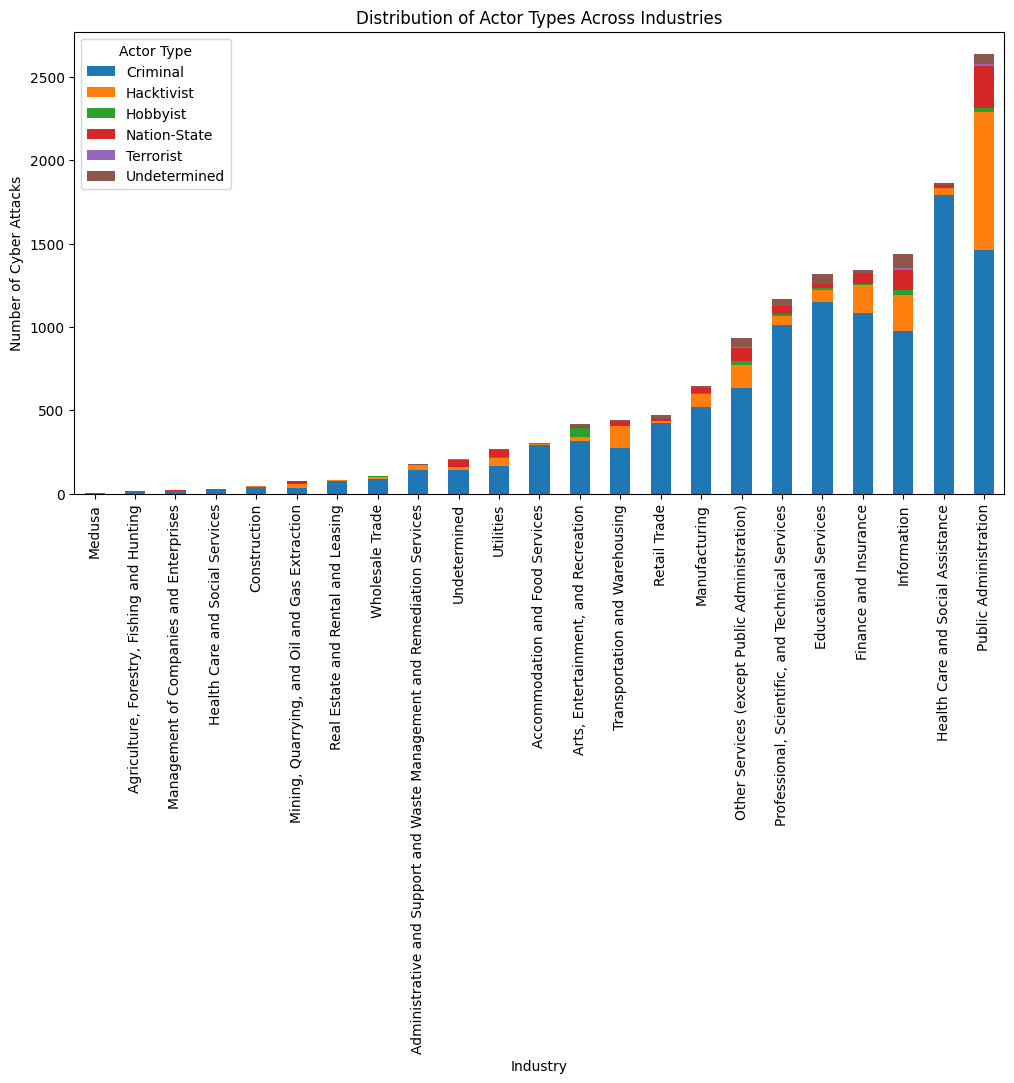

In [71]:
import matplotlib.pyplot as plt
import pandas as pd


dfActorType[['Criminal', 'Hacktivist', 'Hobbyist', 'Nation-State', 'Terrorist', 'Undetermined']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Actor Types Across Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Cyber Attacks')
plt.xticks(range(len(dfActorType)), dfActorType['Sector Title'], rotation=90)
_ = plt.legend(title='Actor Type')
#plt.show()

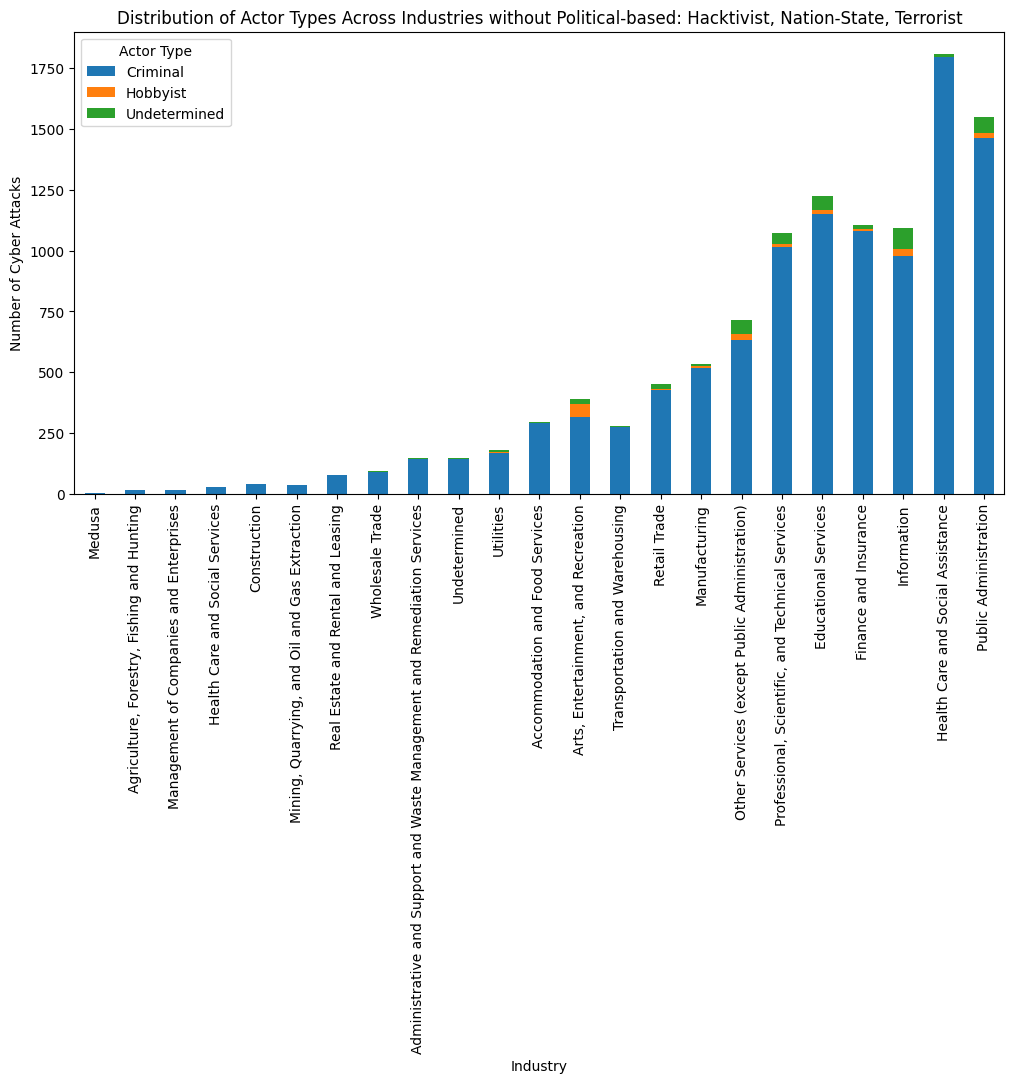

In [72]:
import matplotlib.pyplot as plt
import pandas as pd


dfActorType[['Criminal', 'Hobbyist', 'Undetermined']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Actor Types Across Industries without Political-based: Hacktivist, Nation-State, Terrorist')
plt.xlabel('Industry')
plt.ylabel('Number of Cyber Attacks')
plt.xticks(range(len(dfActorType)), dfActorType['Sector Title'], rotation=90)
_ = plt.legend(title='Actor Type')
#plt.show()

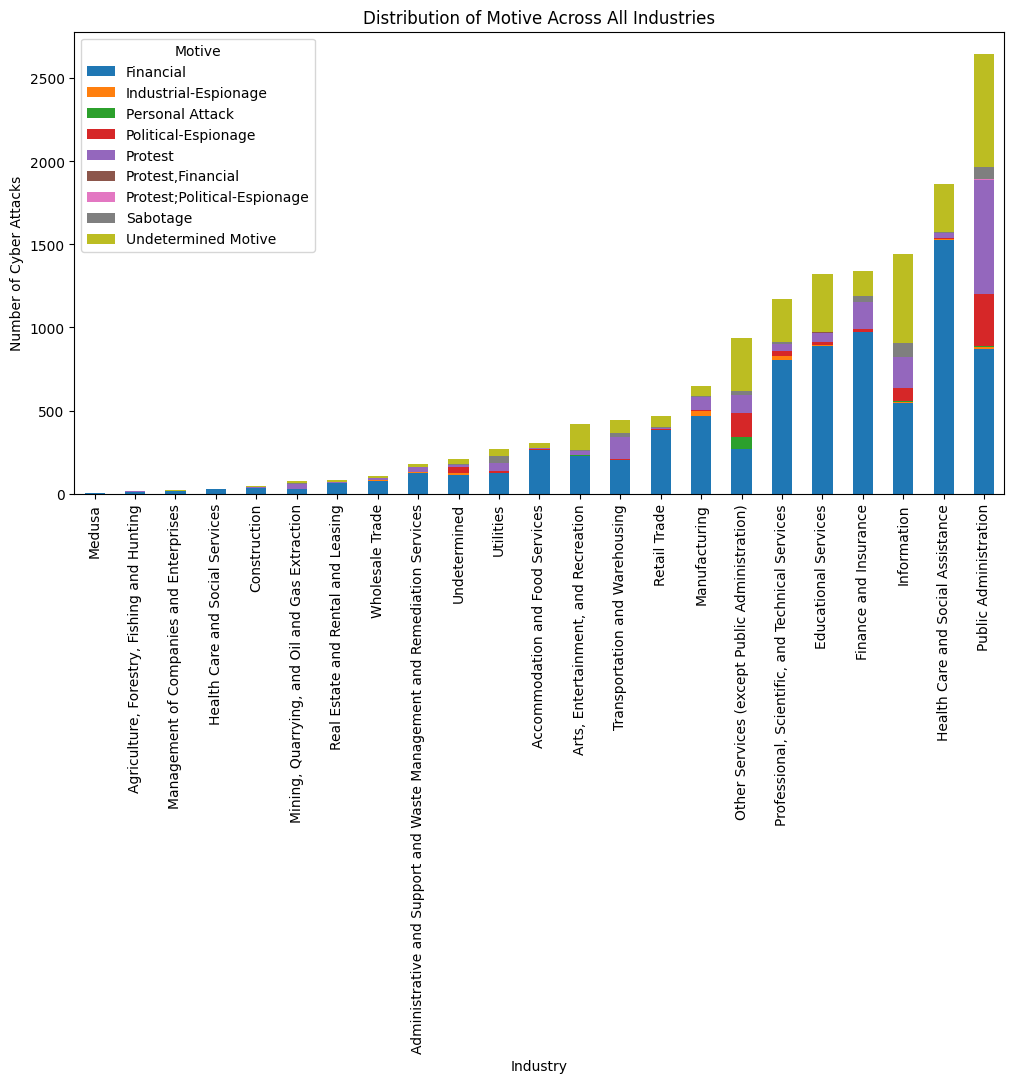

In [73]:
dfMotive[['Financial'	,'Industrial-Espionage'	,'Personal Attack'	,'Political-Espionage'	,'Protest'	,'Protest,Financial'	,'Protest;Political-Espionage'	,'Sabotage'	,'Undetermined Motive']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Motive Across All Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Cyber Attacks')
plt.xticks(range(len(dfActorType)), dfActorType['Sector Title'], rotation=90)
_ = plt.legend(title='Motive')

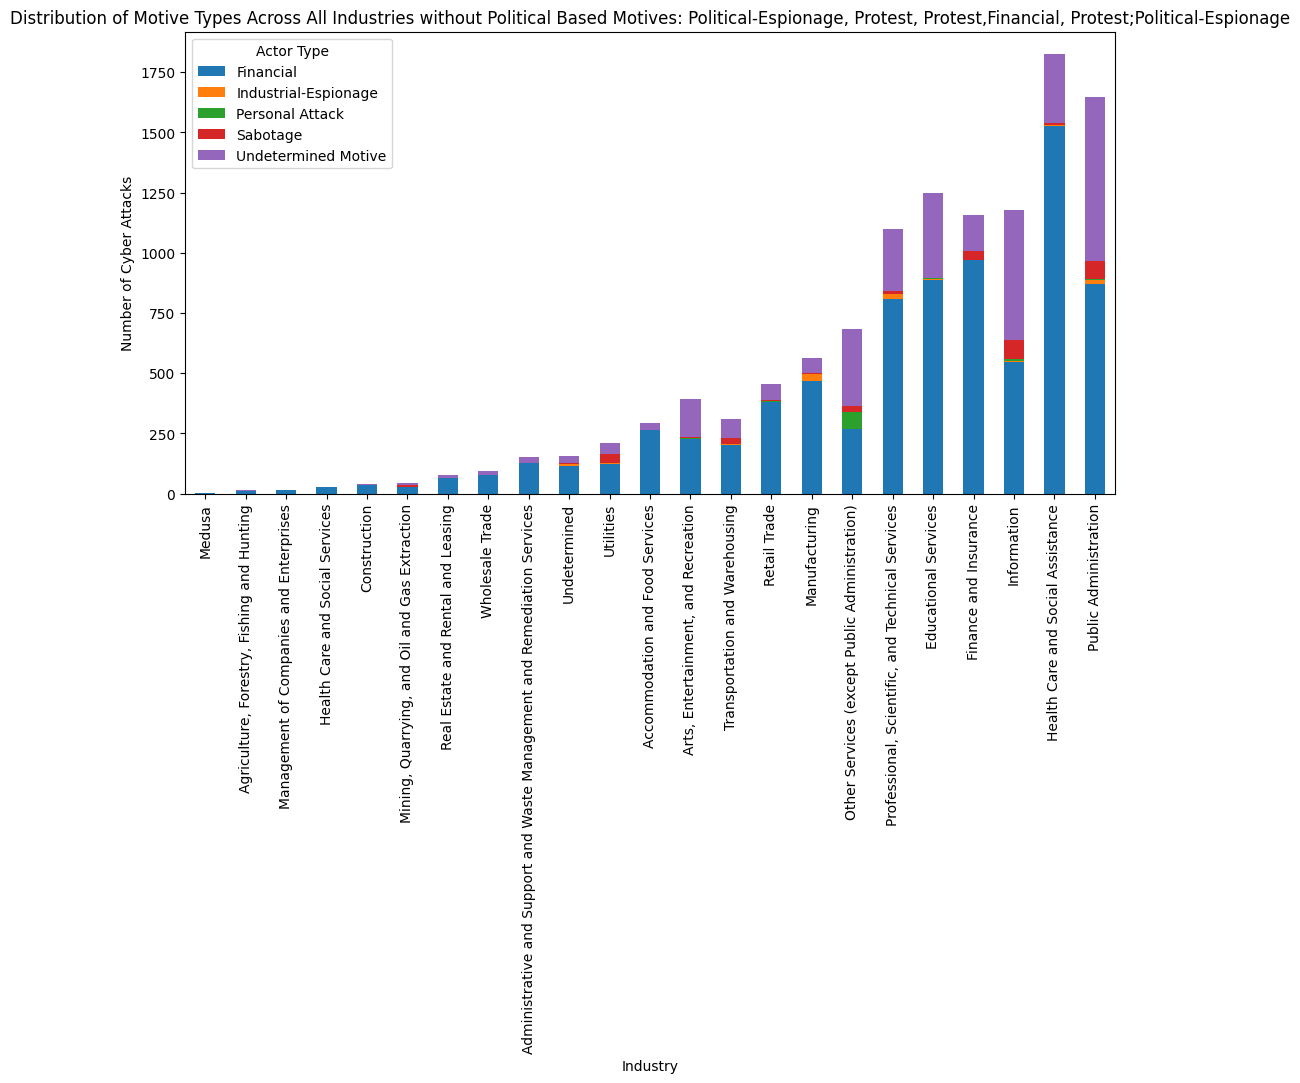

In [74]:
dfMotive[['Financial'	,'Industrial-Espionage'	,'Personal Attack','Sabotage'	,'Undetermined Motive']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Motive Types Across All Industries without Political Based Motives: Political-Espionage, Protest, Protest,Financial, Protest;Political-Espionage')
plt.xlabel('Industry')
plt.ylabel('Number of Cyber Attacks')
plt.xticks(range(len(dfActorType)), dfActorType['Sector Title'], rotation=90)
_ = plt.legend(title='Actor Type')

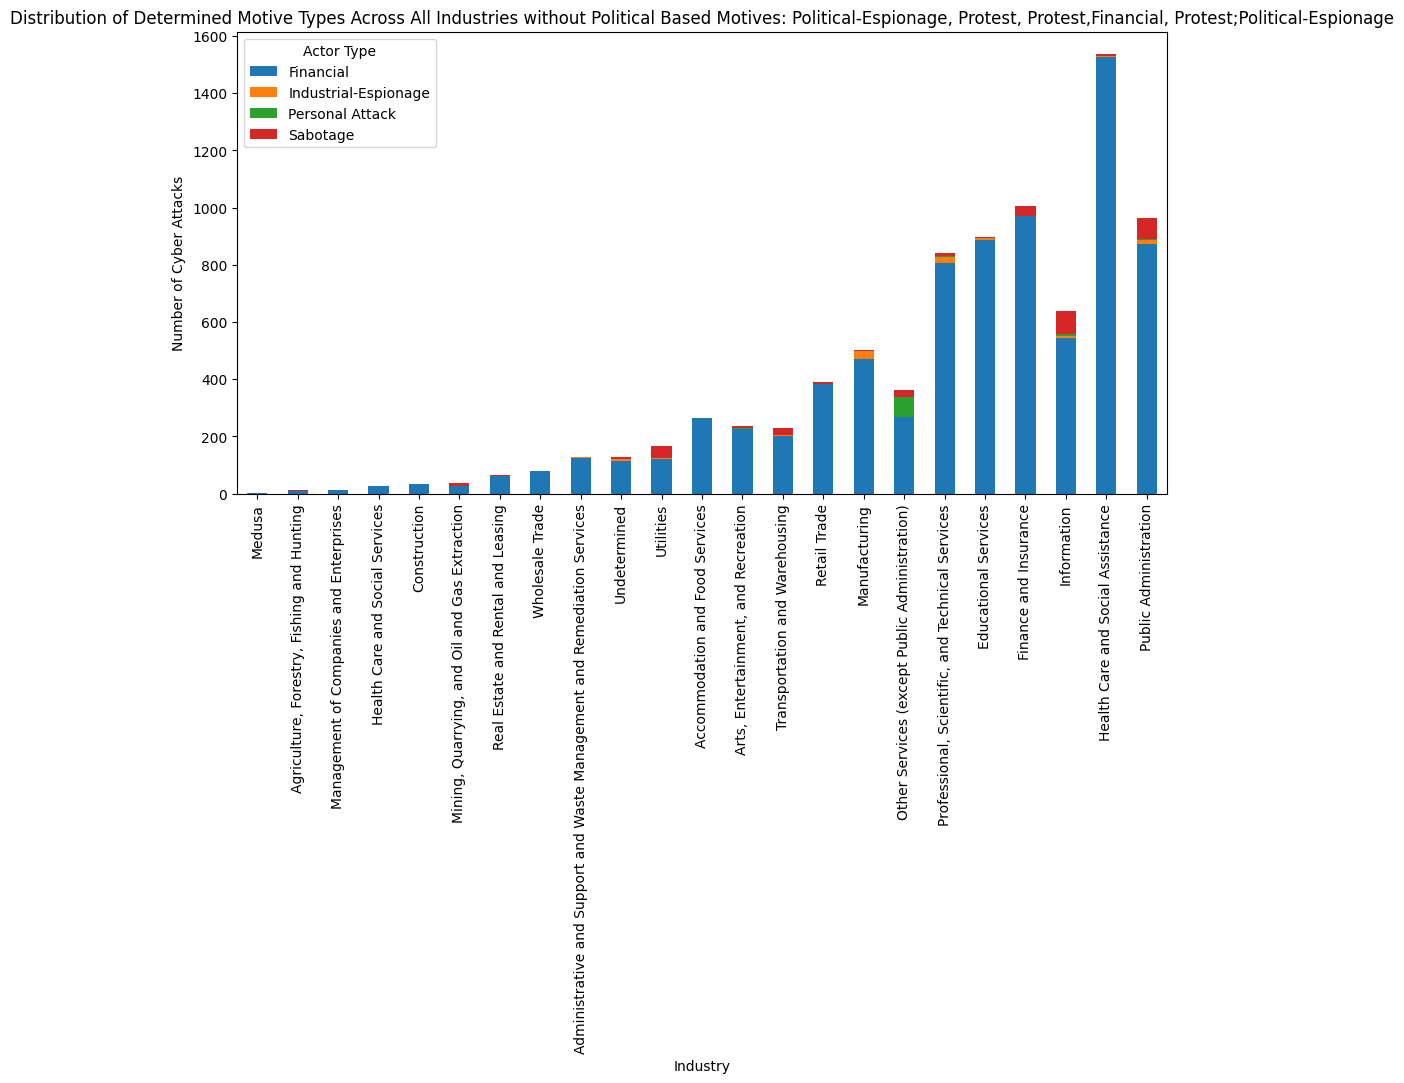

In [75]:
dfMotive[['Financial'	,'Industrial-Espionage'	,'Personal Attack','Sabotage']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Determined Motive Types Across All Industries without Political Based Motives: Political-Espionage, Protest, Protest,Financial, Protest;Political-Espionage')
plt.xlabel('Industry')
plt.ylabel('Number of Cyber Attacks')
plt.xticks(range(len(dfActorType)), dfActorType['Sector Title'], rotation=90)
_ = plt.legend(title='Actor Type')

In [76]:
#1. Criminal actors in public administration


In [77]:
public_admin_criminal = dfActorType[dfActorType['Sector Title'] == 'Public Administration']

In [78]:
public_admin_criminal

actor_type           Sector Title  Criminal  Hacktivist  Hacktvist  Hobbyist  \
16          Public Administration      1461         830          8        24   

actor_type  Nation-State  Terrorist  Undetermined  industry_counts  
16                   252          8            65             2648

In [79]:
import pandas as pd
import plotly.express as px

# Create a DataFrame for the pie chart
data = {
    'Threat Actor': ['Criminal', 'Hacktivist', 'Hacktvist', 'Hobbyist', 'Nation-State', 'Terrorist', 'Undetermined'],
    'Count': [public_admin_criminal['Criminal'].iloc[0],
              public_admin_criminal['Hacktivist'].iloc[0],
              public_admin_criminal['Hacktvist'].iloc[0],
              public_admin_criminal['Hobbyist'].iloc[0],
              public_admin_criminal['Nation-State'].iloc[0],
              public_admin_criminal['Terrorist'].iloc[0],
              public_admin_criminal['Undetermined'].iloc[0]]
}
df_pie = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df_pie, values='Count', names='Threat Actor', title='Threat Actors in Public Administration')
fig.show()


In [80]:
import pandas as pd
import plotly.express as px

# Create a DataFrame for the pie chart
data = {
    'Threat Actor': ['Criminal', 'Hacktivist', 'Hacktvist', 'Hobbyist', 'Nation-State', 'Terrorist'],
    'Count': [public_admin_criminal['Criminal'].iloc[0],
              public_admin_criminal['Hacktivist'].iloc[0],
              public_admin_criminal['Hacktvist'].iloc[0],
              public_admin_criminal['Hobbyist'].iloc[0],
              public_admin_criminal['Nation-State'].iloc[0],
              public_admin_criminal['Terrorist'].iloc[0]]
}
df_pie = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df_pie, values='Count', names='Threat Actor', title='Determined Threat Actors in Public Administration')
fig.show()


In [81]:
# 2. Criminal actors in healthcare and social assistance

In [82]:
public_admin_motive = dfMotive[dfActorType['Sector Title'] == 'Public Administration']

In [83]:
import pandas as pd
import plotly.express as px

# Create a DataFrame for the pie chart
data = {
    'Threat Actor': ['Financial',
 'Industrial-Espionage',
 'Personal Attack',
 'Political-Espionage',
 'Protest',
 'Protest,Financial',
 'Protest;Political-Espionage',
 'Sabotage',
 'Undetermined Motive'],
    'Count': [public_admin_motive['Financial'].iloc[0],
              public_admin_motive['Industrial-Espionage'].iloc[0],
              public_admin_motive['Personal Attack'].iloc[0],
              public_admin_motive['Political-Espionage'].iloc[0],
              public_admin_motive['Protest'].iloc[0],
              public_admin_motive['Protest,Financial'].iloc[0],
              public_admin_motive['Protest;Political-Espionage'].iloc[0],
              public_admin_motive['Sabotage'].iloc[0],
              public_admin_motive['Undetermined Motive'].iloc[0]]
}
df_pie = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df_pie, values='Count', names='Threat Actor', title='Motives of Attacks on Public Administration')
fig.show()


In [84]:
import pandas as pd
import plotly.express as px

# Create a DataFrame for the pie chart
data = {
    'Threat Actor': ['Financial',
 'Industrial-Espionage',
 'Personal Attack',
 'Political-Espionage',
 'Protest',
 'Protest,Financial',
 'Protest;Political-Espionage',
 'Sabotage'],
    'Count': [public_admin_motive['Financial'].iloc[0],
              public_admin_motive['Industrial-Espionage'].iloc[0],
              public_admin_motive['Personal Attack'].iloc[0],
              public_admin_motive['Political-Espionage'].iloc[0],
              public_admin_motive['Protest'].iloc[0],
              public_admin_motive['Protest,Financial'].iloc[0],
              public_admin_motive['Protest;Political-Espionage'].iloc[0],
              public_admin_motive['Sabotage'].iloc[0]]
}
df_pie = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df_pie, values='Count', names='Threat Actor', title='Determined Motives of Attacks on Public Administration')
fig.show()


In [85]:
healthcareCriminal = dfActorType[dfActorType['Sector Title'] == 'Health Care and Social Assistance']

In [86]:
import pandas as pd
import plotly.express as px

# Create a DataFrame for the pie chart
data = {
    'Threat Actor': ['Criminal', 'Hacktivist', 'Hacktvist', 'Hobbyist', 'Nation-State', 'Terrorist', 'Undetermined'],
    'Count': [healthcareCriminal['Criminal'].iloc[0],
              healthcareCriminal['Hacktivist'].iloc[0],
              healthcareCriminal['Hacktvist'].iloc[0],
              healthcareCriminal['Hobbyist'].iloc[0],
              healthcareCriminal['Nation-State'].iloc[0],
              healthcareCriminal['Terrorist'].iloc[0],
              healthcareCriminal['Undetermined'].iloc[0]]
}
df_pie = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df_pie, values='Count', names='Threat Actor', title='Threat Actors in Health Care and Social Assistance')
fig.show()


In [87]:
import pandas as pd
import plotly.express as px

# Create a DataFrame for the pie chart
data = {
    'Threat Actor': ['Criminal', 'Hacktivist', 'Hacktvist', 'Hobbyist', 'Nation-State', 'Terrorist'],
    'Count': [healthcareCriminal['Criminal'].iloc[0],
              healthcareCriminal['Hacktivist'].iloc[0],
              healthcareCriminal['Hacktvist'].iloc[0],
              healthcareCriminal['Hobbyist'].iloc[0],
              healthcareCriminal['Nation-State'].iloc[0],
              healthcareCriminal['Terrorist'].iloc[0]]
}
df_pie = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df_pie, values='Count', names='Threat Actor', title='Determined Threat Actors in Health Care and Social Assistance')
fig.show()


In [88]:
healthcareMotive = dfMotive[dfActorType['Sector Title'] == 'Health Care and Social Assistance']

In [89]:
import pandas as pd
import plotly.express as px

# Create a DataFrame for the pie chart
data = {
    'Threat Actor': ['Financial',
 'Industrial-Espionage',
 'Personal Attack',
 'Political-Espionage',
 'Protest',
 'Protest,Financial',
 'Protest;Political-Espionage',
 'Sabotage',
 'Undetermined Motive'],
    'Count': [healthcareMotive['Financial'].iloc[0],
              healthcareMotive['Industrial-Espionage'].iloc[0],
              healthcareMotive['Personal Attack'].iloc[0],
              healthcareMotive['Political-Espionage'].iloc[0],
              healthcareMotive['Protest'].iloc[0],
              healthcareMotive['Protest,Financial'].iloc[0],
              healthcareMotive['Protest;Political-Espionage'].iloc[0],
              healthcareMotive['Sabotage'].iloc[0],
              healthcareMotive['Undetermined Motive'].iloc[0]]
}
df_pie = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df_pie, values='Count', names='Threat Actor', title='Motives of Attacks on Health Care and Social Assistance')
fig.show()


In [90]:
import pandas as pd
import plotly.express as px

# Create a DataFrame for the pie chart
data = {
    'Threat Actor': ['Financial',
 'Industrial-Espionage',
 'Personal Attack',
 'Political-Espionage',
 'Protest',
 'Protest,Financial',
 'Protest;Political-Espionage',
 'Sabotage'],
    'Count': [healthcareMotive['Financial'].iloc[0],
              healthcareMotive['Industrial-Espionage'].iloc[0],
              healthcareMotive['Personal Attack'].iloc[0],
              healthcareMotive['Political-Espionage'].iloc[0],
              healthcareMotive['Protest'].iloc[0],
              healthcareMotive['Protest,Financial'].iloc[0],
              healthcareMotive['Protest;Political-Espionage'].iloc[0],
              healthcareMotive['Sabotage'].iloc[0]]
}
df_pie = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df_pie, values='Count', names='Threat Actor', title='Determined Motives of Attacks on Health Care and Social Assistance')
fig.show()


In [91]:
infoCriminal = dfActorType[dfActorType['Sector Title'] == 'Information']

In [92]:
infoCriminal

actor_type Sector Title  Criminal  Hacktivist  Hacktvist  Hobbyist  \
9           Information       978         213          1        29   

actor_type  Nation-State  Terrorist  Undetermined  industry_counts  
9                    122         14            84             1441

In [93]:
import pandas as pd
import plotly.express as px

# Create a DataFrame for the pie chart
data = {
    'Threat Actor': ['Criminal', 'Hacktivist', 'Hacktvist', 'Hobbyist', 'Nation-State', 'Terrorist', 'Undetermined'],
    'Count': [infoCriminal['Criminal'].iloc[0],
              infoCriminal['Hacktivist'].iloc[0],
              infoCriminal['Hacktvist'].iloc[0],
              infoCriminal['Hobbyist'].iloc[0],
              infoCriminal['Nation-State'].iloc[0],
              infoCriminal['Terrorist'].iloc[0],
              infoCriminal['Undetermined'].iloc[0]]
}
df_pie = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df_pie, values='Count', names='Threat Actor', title='Threat Actors in Information')
fig.show()


In [94]:
import pandas as pd
import plotly.express as px

# Create a DataFrame for the pie chart
data = {
    'Threat Actor': ['Criminal', 'Hacktivist', 'Hacktvist', 'Hobbyist', 'Nation-State', 'Terrorist'],
    'Count': [infoCriminal['Criminal'].iloc[0],
              infoCriminal['Hacktivist'].iloc[0],
              infoCriminal['Hacktvist'].iloc[0],
              infoCriminal['Hobbyist'].iloc[0],
              infoCriminal['Nation-State'].iloc[0],
              infoCriminal['Terrorist'].iloc[0]]
}
df_pie = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df_pie, values='Count', names='Threat Actor', title='Determined Threat Actors in Information')
fig.show()


In [95]:
infoMotive = dfMotive[dfActorType['Sector Title'] == 'Information']

In [96]:
import pandas as pd
import plotly.express as px

# Create a DataFrame for the pie chart
data = {
    'Threat Actor': ['Financial',
 'Industrial-Espionage',
 'Personal Attack',
 'Political-Espionage',
 'Protest',
 'Protest,Financial',
 'Protest;Political-Espionage',
 'Sabotage',
 'Undetermined Motive'],
    'Count': [infoMotive['Financial'].iloc[0],
              infoMotive['Industrial-Espionage'].iloc[0],
              infoMotive['Personal Attack'].iloc[0],
              infoMotive['Political-Espionage'].iloc[0],
              infoMotive['Protest'].iloc[0],
              infoMotive['Protest,Financial'].iloc[0],
              infoMotive['Protest;Political-Espionage'].iloc[0],
              infoMotive['Sabotage'].iloc[0],
              infoMotive['Undetermined Motive'].iloc[0]]
}
df_pie = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df_pie, values='Count', names='Threat Actor', title='Motives of Attacks on Information')
fig.show()


In [97]:
import pandas as pd
import plotly.express as px

# Create a DataFrame for the pie chart
data = {
    'Threat Actor': ['Financial',
 'Industrial-Espionage',
 'Personal Attack',
 'Political-Espionage',
 'Protest',
 'Protest,Financial',
 'Protest;Political-Espionage',
 'Sabotage'],
    'Count': [infoMotive['Financial'].iloc[0],
              infoMotive['Industrial-Espionage'].iloc[0],
              infoMotive['Personal Attack'].iloc[0],
              infoMotive['Political-Espionage'].iloc[0],
              infoMotive['Protest'].iloc[0],
              infoMotive['Protest,Financial'].iloc[0],
              infoMotive['Protest;Political-Espionage'].iloc[0],
              infoMotive['Sabotage'].iloc[0]]
}
df_pie = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df_pie, values='Count', names='Threat Actor', title='Determined Motives of Attacks on Information')
fig.show()


In [98]:
### exploitative disruptive

In [99]:
typeMotiveDf = df.groupby('event_type')['motive'].value_counts().unstack(fill_value=0).reset_index()

In [100]:
typeActorDf = df.groupby('event_type')['actor_type'].value_counts().unstack(fill_value=0).reset_index()

In [101]:
typeActorDf

actor_type    event_type  Criminal  Hacktivist  Hacktvist  Hobbyist  \
0             Disruptive      2470        1389          8       139   
1             Exploitive      5671         439          8        48   
2                  Mixed      2369          72          1         4   
3           Undetermined       166           9          0         0   

actor_type  Nation-State  Terrorist  Undetermined  
0                    256          5            93  
1                    507         25           302  
2                     35          0            19  
3                      5          0             1

In [102]:
disruptiveMotiveDf =  typeMotiveDf[typeMotiveDf['event_type'] == 'Disruptive']

In [103]:








disruptiveMotiveDf

motive  event_type  Financial  Industrial-Espionage  Personal Attack  \
0       Disruptive       1498                     0               27   

motive  Political-Espionage  Protest  Protest,Financial  \
0                         9     1269                  0   

motive  Protest;Political-Espionage  Sabotage  Undetermined  
0                                 0       274          1283

In [104]:
import pandas as pd
import plotly.express as px

# Create a DataFrame for the pie chart
data = {
    'Threat Actor': ['Financial',
 'Industrial-Espionage',
 'Personal Attack',
 'Political-Espionage',
 'Protest',
 'Protest,Financial',
 'Protest;Political-Espionage',
 'Sabotage'],
    'Count': [disruptiveMotiveDf['Financial'].iloc[0],
              disruptiveMotiveDf['Industrial-Espionage'].iloc[0],
              disruptiveMotiveDf['Personal Attack'].iloc[0],
              disruptiveMotiveDf['Political-Espionage'].iloc[0],
              disruptiveMotiveDf['Protest'].iloc[0],
              disruptiveMotiveDf['Protest,Financial'].iloc[0],
              disruptiveMotiveDf['Protest;Political-Espionage'].iloc[0],
              disruptiveMotiveDf['Sabotage'].iloc[0]]
}
df_pie = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df_pie, values='Count', names='Threat Actor', title='Determined Motives of Disruptive Attacks')
fig.show()


In [105]:
exploitiveMotiveDf =  typeMotiveDf[typeMotiveDf['event_type'] == 'Exploitive']

In [106]:
import pandas as pd
import plotly.express as px

# Create a DataFrame for the pie chart
data = {
    'Threat Actor': ['Financial',
 'Industrial-Espionage',
 'Personal Attack',
 'Political-Espionage',
 'Protest',
 'Protest,Financial',
 'Protest;Political-Espionage',
 'Sabotage'],
    'Count': [exploitiveMotiveDf['Financial'].iloc[0],
              exploitiveMotiveDf['Industrial-Espionage'].iloc[0],
              exploitiveMotiveDf['Personal Attack'].iloc[0],
              exploitiveMotiveDf['Political-Espionage'].iloc[0],
              exploitiveMotiveDf['Protest'].iloc[0],
              exploitiveMotiveDf['Protest,Financial'].iloc[0],
              exploitiveMotiveDf['Protest;Political-Espionage'].iloc[0],
              exploitiveMotiveDf['Sabotage'].iloc[0]]
}
df_pie = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df_pie, values='Count', names='Threat Actor', title='Determined Motives of Exploitive Attacks')
fig.show()


In [107]:
exploitiveActorDf =  typeActorDf[typeActorDf['event_type'] == 'Exploitive']

In [108]:
import pandas as pd
import plotly.express as px

# Create a DataFrame for the pie chart
data = {
    'Threat Actor': ['Criminal', 'Hacktivist', 'Hacktvist', 'Hobbyist', 'Nation-State', 'Terrorist'],
    'Count': [exploitiveActorDf['Criminal'].iloc[0],
              exploitiveActorDf['Hacktivist'].iloc[0],
              exploitiveActorDf['Hacktvist'].iloc[0],
              exploitiveActorDf['Hobbyist'].iloc[0],
              exploitiveActorDf['Nation-State'].iloc[0],
              exploitiveActorDf['Terrorist'].iloc[0]]
}
df_pie = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df_pie, values='Count', names='Threat Actor', title='Determined Threat Actors of Exploitive Attacks')
fig.show()


In [109]:
disruptiveActorDf = typeActorDf[typeActorDf['event_type'] == 'Disruptive']

In [110]:
import pandas as pd
import plotly.express as px

# Create a DataFrame for the pie chart
data = {
    'Threat Actor': ['Criminal', 'Hacktivist', 'Hacktvist', 'Hobbyist', 'Nation-State', 'Terrorist'],
    'Count': [disruptiveActorDf['Criminal'].iloc[0],
              disruptiveActorDf['Hacktivist'].iloc[0],
              disruptiveActorDf['Hacktvist'].iloc[0],
              disruptiveActorDf['Hobbyist'].iloc[0],
              disruptiveActorDf['Nation-State'].iloc[0],
              disruptiveActorDf['Terrorist'].iloc[0]]
}
df_pie = pd.DataFrame(data)

# Create the pie chart
fig = px.pie(df_pie, values='Count', names='Threat Actor', title='Determined Threat Actors of Disruptive Attacks')
fig.show()


In [111]:
disruptiveActorDf

actor_type  event_type  Criminal  Hacktivist  Hacktvist  Hobbyist  \
0           Disruptive      2470        1389          8       139   

actor_type  Nation-State  Terrorist  Undetermined  
0                    256          5            93

# Country

In [ ]:
actorStateCts = df.groupby('actor_country').size().reset_index(name='counts')
actorStateCts.sort_values(by='counts', ascending=False, inplace=True)
actorStateCts

actor_country  counts
74                                 Undetermined   10597
60                           Russian Federation    1847
16                                        China     171
38  Korea (the Democratic People's Republic of)     160
77                     United States of America     142
..                                          ...     ...
66                                    Sri Lanka       1
55                                         Peru       1
63                                 Sierra Leone       1
25                                        Ghana       1
0                                   Afghanistan       1

[82 rows x 2 columns]

In [ ]:
affectedCts = df.groupby('country').size().reset_index(name='counts')
affectedCts.sort_values(by='counts', ascending=False, inplace=True)
affectedCts

country  counts
161                           United States of America    6779
160  United Kingdom of Great Britain and Northern I...     756
70                                               Italy     413
157                                            Ukraine     407
126                                 Russian Federation     389
..                                                 ...     ...
116                                   Papua New Guinea       1
67                            Islamic Republic of Iran       1
32                                                Cuba       1
147                                         Tajikistan       1
85                                             Lesotho       1

[171 rows x 2 columns]

In [ ]:
## poverty and inequality indicators
# pip.csv from https://pip.worldbank.org/poverty-calculator

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/My Drive/GoogColab/effectsBreach/data
pipDf = pd.read_csv('pip.csv', encoding='latin-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/GoogColab/effectsBreach/data


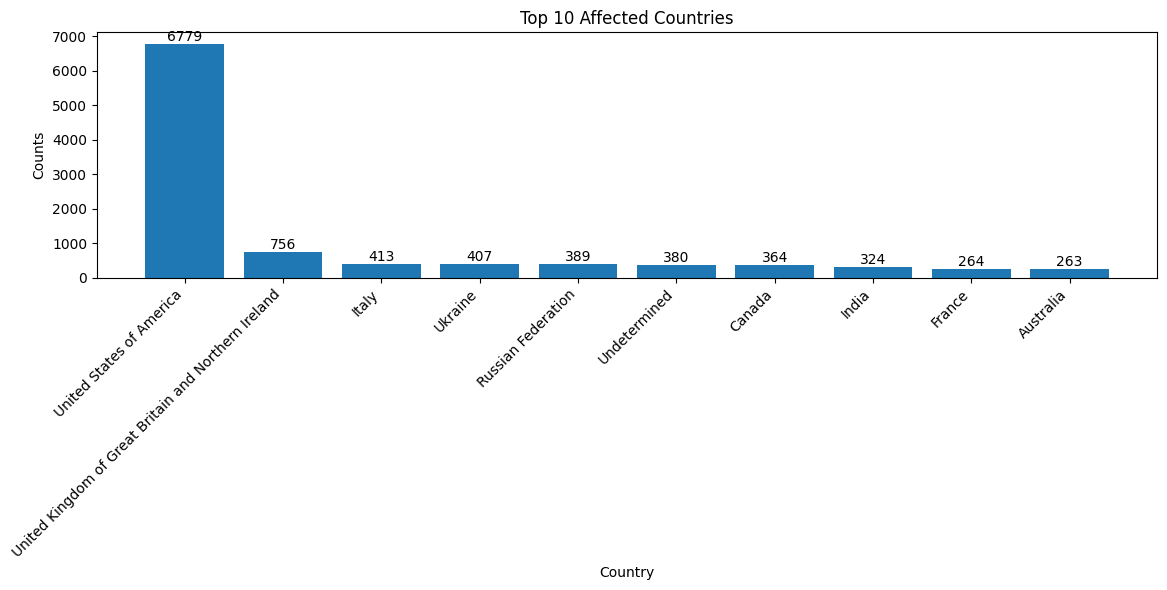

In [ ]:
import matplotlib.pyplot as plt

top_10_countries = affectedCts.head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_countries['country'], top_10_countries['counts'])
plt.xlabel('Country')
plt.ylabel('Counts')
plt.title('Top 10 Affected Countries')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.tight_layout()
plt.show()

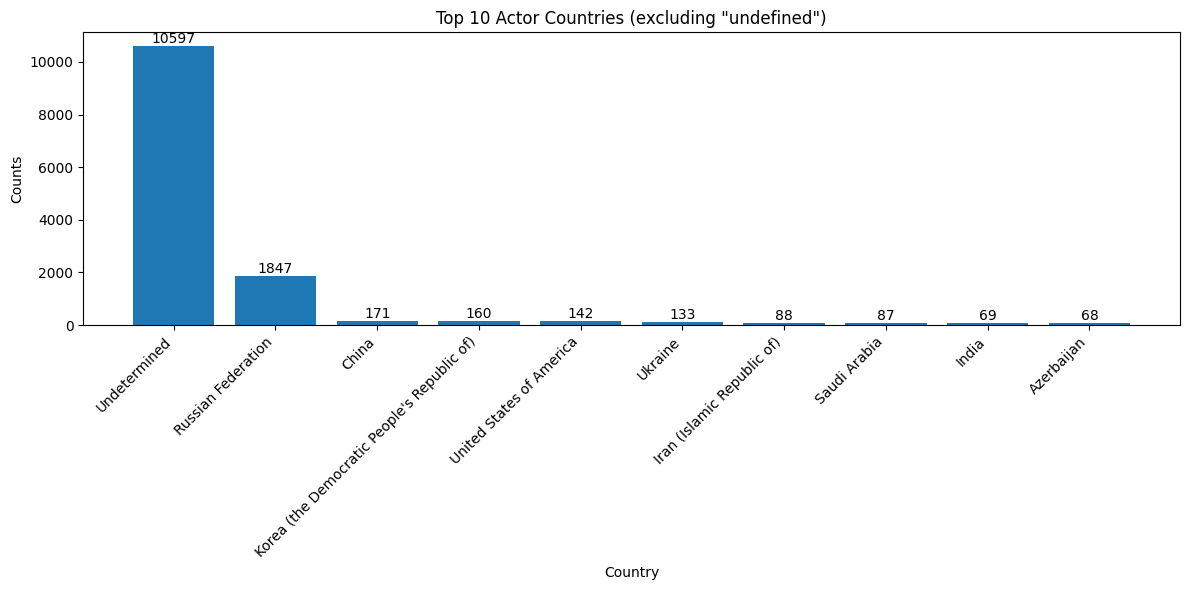

In [ ]:
import matplotlib.pyplot as plt

actorStateCts_filtered = actorStateCts[actorStateCts['actor_country'] != 'undefined']

top_10_countries = actorStateCts_filtered.sort_values(by='counts', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_countries['actor_country'], top_10_countries['counts'])
plt.xlabel('Country')
plt.ylabel('Counts')
plt.title('Top 10 Actor Countries (excluding "undefined")')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.tight_layout()
plt.show()

In [ ]:
pipDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   region_name           2456 non-null   object 
 1   region_code           2456 non-null   object 
 2   country_name          2456 non-null   object 
 3   country_code          2456 non-null   object 
 4   reporting_year        2456 non-null   int64  
 5   reporting_level       2456 non-null   object 
 6   survey_acronym        2456 non-null   object 
 7   survey_coverage       2456 non-null   object 
 8   survey_year           2456 non-null   float64
 9   welfare_type          2456 non-null   object 
 10  survey_comparability  2456 non-null   int64  
 11  comparable_spell      2456 non-null   object 
 12  poverty_line          2456 non-null   float64
 13  headcount             2456 non-null   float64
 14  poverty_gap           2456 non-null   float64
 15  poverty_severity     

In [ ]:
pipDf

region_name region_code country_name country_code  \
0        Sub-Saharan Africa         SSA       Angola          AGO   
1        Sub-Saharan Africa         SSA       Angola          AGO   
2        Sub-Saharan Africa         SSA       Angola          AGO   
3     Europe & Central Asia         ECA      Albania          ALB   
4     Europe & Central Asia         ECA      Albania          ALB   
...                     ...         ...          ...          ...   
2451     Sub-Saharan Africa         SSA       Zambia          ZMB   
2452     Sub-Saharan Africa         SSA       Zambia          ZMB   
2453     Sub-Saharan Africa         SSA     Zimbabwe          ZWE   
2454     Sub-Saharan Africa         SSA     Zimbabwe          ZWE   
2455     Sub-Saharan Africa         SSA     Zimbabwe          ZWE   

      reporting_year reporting_level survey_acronym survey_coverage  \
0               2000        national            HBS        national   
1               2008        national      IBEP-MICS        national   
2               2018        national          IDREA        national   
3               1996        national            EWS        national   
4               2002        national           LSMS        national   
...              ...             ...            ...             ...   
2451            2015        national       LCMS-VII        national   
2452            2022        national      LCMS-VIII        national   
2453            2011        national           ICES        national   
2454            2017        national          PICES        national   
2455            2019        national          PICES        national   

      survey_year welfare_type  ...  reporting_pop reporting_gdp  \
0         2000.21  consumption  ...    16509042.25   1909.502065   
1         2008.50  consumption  ...    22099598.00   3176.672166   
2         2018.17  consumption  ...    31457142.35   2777.843045   
3         1996.00  consumption  ...     3168033.00   1633.552000   
4         2002.00  consumption  ...     3051010.00   2247.498080   
...           ...          ...  ...            ...           ...   
2451      2015.00  consumption  ...    16248230.00   1307.909649   
2452      2022.00  consumption  ...    20017675.00   1308.101838   
2453      2011.00  consumption  ...    13025785.00   1239.241793   
2454      2017.00  consumption  ...    14751101.00   1421.240769   
2455      2019.00  consumption  ...    15354608.00   1342.989586   

      reporting_pce  is_interpolated  distribution_type  estimation_type  \
0               NaN            False              micro           survey   
1       1201.311092            False              micro           survey   
2       1495.340595            False              micro           survey   
3       1716.336801            False              micro           survey   
4       1685.203078            False              micro           survey   
...             ...              ...                ...              ...   
2451     662.412898            False              micro           survey   
2452            NaN            False            imputed           survey   
2453     967.844700            False              group           survey   
2454    1099.361086            False              micro           survey   
2455    1020.297262            False            imputed           survey   

           spl       spr         pg  estimate_type  
0     3.486659  0.372371   9.722334            NaN  
1     3.501550  0.353722   6.925334            NaN  
2     2.860251  0.422226  11.098810            NaN  
3     4.636051  0.195180   3.999503            NaN  
4     4.494071  0.212854   4.208419            NaN  
...        ...       ...        ...            ...  
2451  2.150000  0.607931  23.087937            NaN  
2452  2.150000  0.643497  23.058921            NaN  
2453  3.049416  0.383260   7.863172            NaN  
2454  2.587279  0.440398   9.875030            NaN  
2455  2.477409  0.467

# Potential Regression Analyses

Predicting Event Frequency over time:
we can use year and month as predictors to do the model. Linear regression. How has the number of cybersecuirty incidents changed over time?

Impact of Actor Type on event subtypes. We will use actor_type as a categorical variable to predict event subtype. Logistic Regression. Are certain actor types more likely to perform specific types of events

Using country and motive to predict event frequency or the likelihood of a specific event type. Linear Regression. Does the country or motive significantly influence the number of incidents?

In [ ]:
import matplotlib as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/mainData.csv', encoding='latin-1')

FileNotFoundError: [Errno 2] No such file or directory: '/content/mainData.csv'

In [ ]:
df.head()

In [ ]:
df['event_date'] = pd.to_datetime(df['event_date'], format = 'mixed')


In [ ]:
df.head()

In [ ]:
event_frequency = df.groupby(df['event_date'].dt.to_period('M')).size().reset_index(name='event_count')

In [ ]:
event_frequency['event_date'] = event_frequency['event_date'].dt.to_timestamp()

In [ ]:
event_frequency.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.lineplot(data = event_frequency,x='event_date',y='event_count',marker='o')
plt.title('Event Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

In [ ]:
event_frequency['timestamp'] = event_frequency['event_date'].map(lambda x:x.toordinal())
X = event_frequency[['timestamp']]
y = event_frequency['event_count']

In [ ]:
X

In [ ]:
y

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [ ]:
model_coefficients = model.coef_
model_intercept = model.intercept_

In [ ]:
mse

In [ ]:
r2

In [ ]:
model_coefficients

In [ ]:
model_intercept

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(event_frequency['timestamp'],event_frequency['event_count'],color='red',alpha=0.5,label='Actual Data')
regression_line = model.predict(event_frequency[['timestamp']])
plt.plot(event_frequency['timestamp'],regression_line,color='green',linewidth=2,label='Regression Line')

In [ ]:
df['actor_type'].unique()

In [ ]:
df['actor_type'] = df['actor_type'].replace('Hacktvist','Hacktivist')
df['actor_type'].unique()

In [ ]:
df_encoded = pd.get_dummies(df,columns=['actor_type','event_type'],drop_first=True)

In [ ]:
df_encoded

In [ ]:
df_encoded.columns

In [ ]:
df_encoded.columns = df_encoded.columns.str.strip()


In [ ]:
grouped_data = df_encoded.groupby(df_encoded['event_date'].dt.to_period('M')).agg({
    'event_date': 'first',
    'actor_type_Nation-State': 'sum',
    'actor_type_Hacktivist': 'sum',
    'actor_type_Terrorist': 'sum',
    'actor_type_Undetermined': 'sum',
    'actor_type_Hobbyist': 'sum',
    'event_type_Disruptive':'sum',
    'event_type_Exploitive':'sum',
    'event_type_Mixed':'sum',
    'event_type_Undetermined':'sum',
    'slug':'count'
}).rename(columns={'slug':'event_count'})

In [ ]:
grouped_data.head()

In [ ]:
grouped_data.index = grouped_data.index.to_timestamp()
grouped_data['timestamp'] = grouped_data.index.map(lambda x:x.toordinal())

In [ ]:
grouped_data.columns

In [ ]:
X = grouped_data[['timestamp','actor_type_Nation-State','actor_type_Hacktivist','actor_type_Terrorist', 'actor_type_Undetermined',
       'actor_type_Hobbyist', 'event_type_Disruptive', 'event_type_Exploitive',
       'event_type_Mixed', 'event_type_Undetermined']]
y = grouped_data['event_count']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [ ]:
mse

In [ ]:
r2

In [ ]:
model.coef_

In [ ]:
model.intercept_

## Country and Motive Regression

In [ ]:
df_encoded = pd.get_dummies(df,columns=['country','motive'],drop_first=True)

In [ ]:
df_encoded.columns

In [ ]:
grouped_data = df_encoded.groupby(df_encoded['event_date'].dt.to_period('M')).agg({
    'event_date': 'first',
    'slug': 'count',
    **{col: 'sum' for col in df_encoded.columns if col.startswith('country_')},
    **{col: 'sum' for col in df_encoded.columns if col.startswith('motive_')}
}).rename(columns={'slug': 'event_count'})

In [ ]:
grouped_data.index = grouped_data.index.to_timestamp()

In [ ]:
X = grouped_data.drop(columns=['event_date','event_count'])
y = grouped_data['event_count']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [ ]:
mse

In [ ]:
r2

In [ ]:
model.coef_

In [ ]:
model.intercept_

-0.7745216639560937

## country and motive prediction

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
df_encoded = pd.get_dummies(df,columns=['country','motive'],drop_first=True)

In [ ]:
X = df_encoded.filter(regex='^country_')
y = df_encoded.filter(regex='^motive_')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
logistic_model = MultiOutputRegressor(LogisticRegression(max_iter=1000))
logistic_model.fit(X_train,y_train)

MultiOutputRegressor(estimator=LogisticRegression(max_iter=1000))

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
accuracy_scores = (y_pred == y_test.values).mean(axis=0)

In [ ]:
accuracy_scores

array([0.99572802, 0.98932004, 0.95407618, 0.89676041, 1.        ,
       1.        , 0.97365611, 0.76931292])

In [ ]:
logistic_model.estimators_

[LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=1000)]

In [ ]:
df['motive'].unique()

array(['Undetermined', 'Protest', 'Financial', 'Political-Espionage',
       'Industrial-Espionage', 'Personal Attack', 'Sabotage',
       'Protest,Financial', 'Protest;Political-Espionage'], dtype=object)

In [ ]:
pip_data = pd.read_csv("pip.csv")
pip_data.head()

region_name region_code country_name country_code  \
0     Sub-Saharan Africa         SSA       Angola          AGO   
1     Sub-Saharan Africa         SSA       Angola          AGO   
2     Sub-Saharan Africa         SSA       Angola          AGO   
3  Europe & Central Asia         ECA      Albania          ALB   
4  Europe & Central Asia         ECA      Albania          ALB   

   reporting_year reporting_level survey_acronym survey_coverage  survey_year  \
0            2000        national            HBS        national      2000.21   
1            2008        national      IBEP-MICS        national      2008.50   
2            2018        national          IDREA        national      2018.17   
3            1996        national            EWS        national      1996.00   
4            2002        national           LSMS        national      2002.00   

  welfare_type  ...  reporting_pop reporting_gdp  reporting_pce  \
0  consumption  ...    16509042.25   1909.502065            NaN   
1  consumption  ...    22099598.00   3176.672166    1201.311092   
2  consumption  ...    31457142.35   2777.843045    1495.340595   
3  consumption  ...     3168033.00   1633.552000    1716.336801   
4  consumption  ...     3051010.00   2247.498080    1685.203078   

   is_interpolated  distribution_type  estimation_type       spl       spr  \
0            False              micro           survey  3.486659  0.372371   
1            False              micro           survey  3.501550  0.353722   
2            False              micro           survey  2.860251  0.422226   
3            False              micro           survey  4.636051  0.195180   
4            False              micro           survey  4.494071  0.212854   

          pg  estimate_type  
0   9.722334            NaN  
1   6.925334            NaN  
2  11.098810            NaN  
3   3.999503            NaN  
4   4.208419            NaN  

[5 rows x 44 columns]

In [ ]:
pip_data['country_name'] = pip_data['country_name'].str.strip()
df['country'] = df['country'].str.strip()

In [ ]:
attacks_per_country = df.groupby('country').size().reset_index(name='num_attacks')

In [ ]:
attacks_per_country

country  num_attacks
0       Afghanistan           19
1           Albania            9
2           Algeria            2
3    American Samoa            1
4           Andorra            1
..              ...          ...
165        Viet Nam           21
166         Vietnam            1
167           Yemen            1
168          Zambia            1
169        Zimbabwe            6

[170 rows x 2 columns]

In [ ]:
gdp_data = pip_data[['country_name','reporting_gdp']].groupby('country_name').mean().reset_index()

In [ ]:
gdp_data

country_name  reporting_gdp
0               Albania    3727.032490
1               Algeria    3328.657127
2                Angola    2621.339092
3             Argentina   11506.534885
4               Armenia    3048.224191
..                  ...            ...
165            Viet Nam    2125.033402
166  West Bank and Gaza    2818.402252
167         Yemen, Rep.    2218.190195
168              Zambia     987.870045
169            Zimbabwe    1334.490716

[170 rows x 2 columns]

In [ ]:
merged_data = attacks_per_country.merge(gdp_data,left_on='country',right_on='country_name',how='inner')

In [ ]:
merged_data

country  num_attacks country_name  reporting_gdp
0       Albania            9      Albania    3727.032490
1       Algeria            2      Algeria    3328.657127
2        Angola           32       Angola    2621.339092
3     Argentina           36    Argentina   11506.534885
4       Armenia           56      Armenia    3048.224191
..          ...          ...          ...            ...
110  Uzbekistan            5   Uzbekistan    1739.353116
111     Vanuatu            1      Vanuatu    2793.665067
112    Viet Nam           21     Viet Nam    2125.033402
113      Zambia            1       Zambia     987.870045
114    Zimbabwe            6     Zimbabwe    1334.490716

[115 rows x 4 columns]

In [ ]:
merged_data = merged_data.drop(columns=['country_name'])

In [ ]:
merged_data

country  num_attacks  reporting_gdp
0       Albania            9    3727.032490
1       Algeria            2    3328.657127
2        Angola           32    2621.339092
3     Argentina           36   11506.534885
4       Armenia           56    3048.224191
..          ...          ...            ...
110  Uzbekistan            5    1739.353116
111     Vanuatu            1    2793.665067
112    Viet Nam           21    2125.033402
113      Zambia            1     987.870045
114    Zimbabwe            6    1334.490716

[115 rows x 3 columns]

In [ ]:
from scipy.stats import pearsonr

In [ ]:
correlation, p_value = pearsonr(merged_data['num_attacks'],merged_data['reporting_gdp'])
correlation_res = {"Correlation Coefficient":correlation,"p value":p_value}

In [ ]:
correlation_res

{'Correlation Coefficient': 0.23266902722100408,
 'p value': 0.012339584314399368}

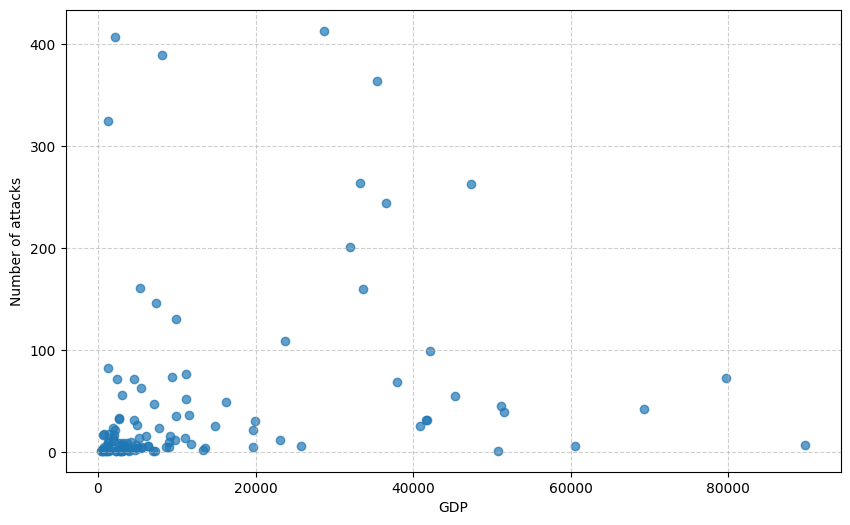

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(merged_data['reporting_gdp'],merged_data['num_attacks'],alpha=0.7)
plt.xlabel('GDP')
plt.ylabel('Number of attacks')
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
X = merged_data['reporting_gdp']
y = merged_data['num_attacks']

In [ ]:
X_with_const = sm.add_constant(X)

In [ ]:
model = sm.OLS(y,X_with_const).fit()

In [ ]:
regression_summary = model.summary()
regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            num_attacks   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     6.467
Date:                Sun, 26 Jan 2025   Prob (F-statistic):             0.0123
Time:                        03:06:01   Log-Likelihood:                -675.04
No. Observations:                 115   AIC:                             1354.
Df Residuals:                     113   BIC:                             1360.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            32.4825      9.977      3.256      0.001      12.717      52.249
reporting_gdp     0.0011      0.000      2.543      0.012       0.000       0.002
==============================================================================
Omnibus:                       86.876   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.274
Skew:                           2.782   Prob(JB):                     2.49e-96
Kurtosis:                      10.806   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
median_gdp = merged_data['reporting_gdp'].median()
high_gdp = merged_data[merged_data['reporting_gdp'] > median_gdp]['num_attacks']
low_gdp = merged_data[merged_data['reporting_gdp'] <= median_gdp]['num_attacks']

In [ ]:
t_stat,p_value_ttest = ttest_ind(high_gdp,low_gdp,equal_var=False)

In [ ]:
t_stat

2.9046807127873153

In [ ]:
p_value_ttest

0.004543092013542058

In [ ]:
pip_data.columns

Index(['region_name', 'region_code', 'country_name', 'country_code',
       'reporting_year', 'reporting_level', 'survey_acronym',
       'survey_coverage', 'survey_year', 'welfare_type',
       'survey_comparability', 'comparable_spell', 'poverty_line', 'headcount',
       'poverty_gap', 'poverty_severity', 'watts', 'mean', 'median', 'mld',
       'gini', 'polarization', 'decile1', 'decile2', 'decile3', 'decile4',
       'decile5', 'decile6', 'decile7', 'decile8', 'decile9', 'decile10',
       'cpi', 'ppp', 'reporting_pop', 'reporting_gdp', 'reporting_pce',
       'is_interpolated', 'distribution_type', 'estimation_type', 'spl', 'spr',
       'pg', 'estimate_type'],
      dtype='object')

In [ ]:
pipData = pip_data[['country_name','reporting_gdp', 'poverty_gap', 'cpi','gini', 'polarization' ]].groupby('country_name').mean().reset_index()

In [ ]:
merged2 = attacks_per_country.merge(pipData,left_on='country',right_on='country_name',how='inner')

In [ ]:
merged2 = merged2.drop(columns=['country_name'])

In [ ]:
merged2

country  num_attacks  reporting_gdp  poverty_gap        cpi      gini  \
0       Albania            9    3727.032490     0.003926   0.906572  0.322512   
1       Algeria            2    3328.657127     0.005665   0.398037  0.334343   
2        Angola           32    2621.339092     0.083497   0.516031  0.486414   
3     Argentina           36   11506.534885     0.011277  10.413204  0.456511   
4       Armenia           56    3048.224191     0.007133   0.813600  0.321028   
..          ...          ...            ...          ...        ...       ...   
110  Uzbekistan            5    1739.353116     0.277617   0.498993  0.359525   
111     Vanuatu            1    2793.665067     0.029787   0.980569  0.348344   
112    Viet Nam           21    2125.033402     0.029658   0.664318  0.361377   
113      Zambia            1     987.870045     0.287399   2.208209  0.519627   
114    Zimbabwe            6    1334.490716     0.093718   0.993548  0.459157   

     polarization  
0        0.286429  
1        0.282461  
2        0.442229  
3        0.435243  
4        0.254472  
..            ...  
110      0.299395  
111      0.295828  
112      0.306086  
113      0.527839  
114      0.422989  

[115 rows x 7 columns]

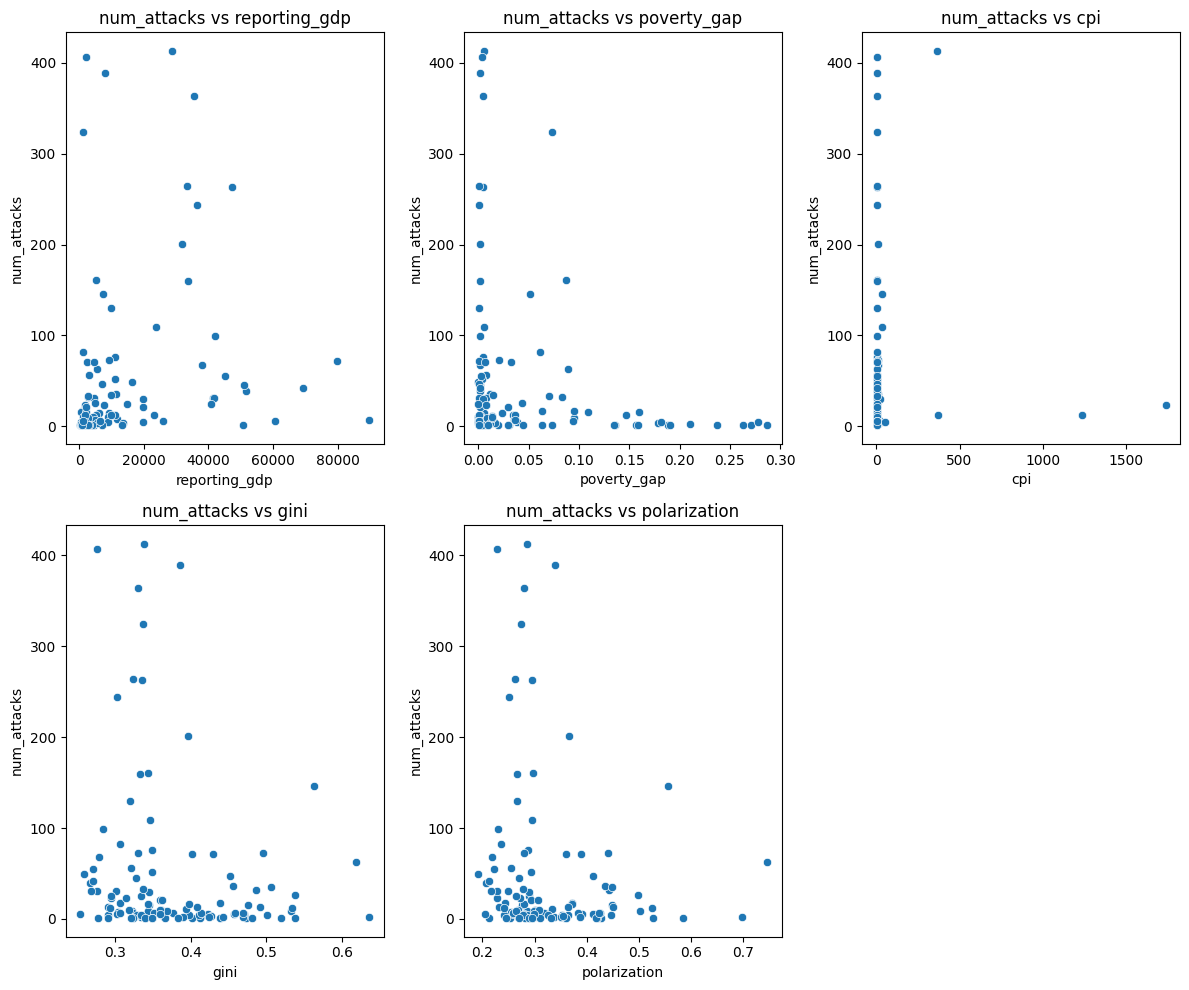

In [ ]:
plt.figure(figsize=(12, 10))
independent_vars = ['reporting_gdp', 'poverty_gap', 'cpi', 'gini', 'polarization']
for i, var in enumerate(independent_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=merged2, x=var, y='num_attacks')
    plt.title(f'num_attacks vs {var}')
    plt.xlabel(var)
    plt.ylabel('num_attacks')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_minpack_py.py:1003: RuntimeWarning:

overflow encountered in square

<ipython-input-293-750989267845>:18: OptimizeWarning:

Covariance of the parameters could not be estimated

<ipython-input-293-750989267845>:8: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_minpack_py.py:1003: RuntimeWarning:

overflow encountered in square

<ipython-input-293-750989267845>:18: OptimizeWarning:

Covariance of the parameters could not be estimated

<ipython-input-293-750989267845>:8: RuntimeWarning:

overflow encountered in exp



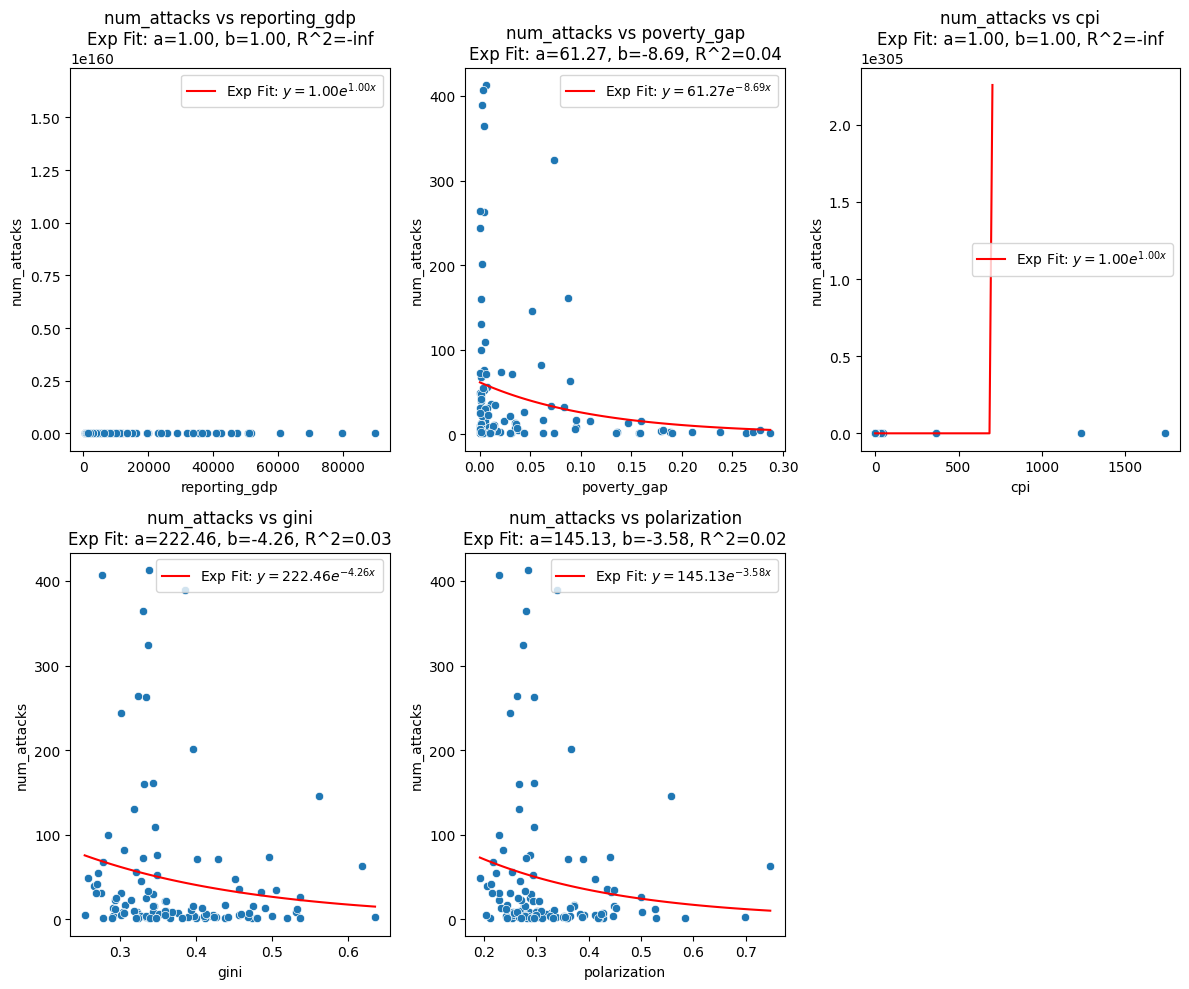

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

def exp_func(x, a, b):
    return a * np.exp(b * x)

plt.figure(figsize=(12, 10))

independent_vars = ['reporting_gdp', 'poverty_gap', 'cpi', 'gini', 'polarization']

for i, var in enumerate(independent_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=merged2, x=var, y='num_attacks')

    popt, _ = curve_fit(exp_func, merged2[var], merged2['num_attacks'], maxfev=10000)
    a, b = popt

    x_vals = np.linspace(merged2[var].min(), merged2[var].max(), 100)
    y_vals = exp_func(x_vals, *popt)

    plt.plot(x_vals, y_vals, color='red', label=f'Exp Fit: $y = {a:.2f} e^{{{b:.2f}x}}$')

    predicted_y = exp_func(merged2[var], a, b)
    ss_res = np.sum((merged2['num_attacks'] - predicted_y) ** 2)
    ss_tot = np.sum((merged2['num_attacks'] - np.mean(merged2['num_attacks'])) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    plt.title(f'num_attacks vs {var}\nExp Fit: a={a:.2f}, b={b:.2f}, R^2={r2:.2f}')
    plt.xlabel(var)
    plt.ylabel('num_attacks')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
gdp_bins = pd.qcut(merged_data['reporting_gdp'],q=3,labels=['Low GDP','Medium GDP','High GDP'])

In [ ]:
merged_data['GDP_Range'] = gdp_bins
gdp_range_comparison = merged_data.groupby('GDP_Range')['num_attacks'].agg(['mean','count','std']).reset_index()

<ipython-input-295-22967807fb7c>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
gdp_range_comparison

GDP_Range       mean  count         std
0     Low GDP  30.447368     38   82.534415
1  Medium GDP  30.763158     38   69.836270
2    High GDP  80.205128     39  102.243564

Text(0, 0.5, 'Avg Num Attacks')

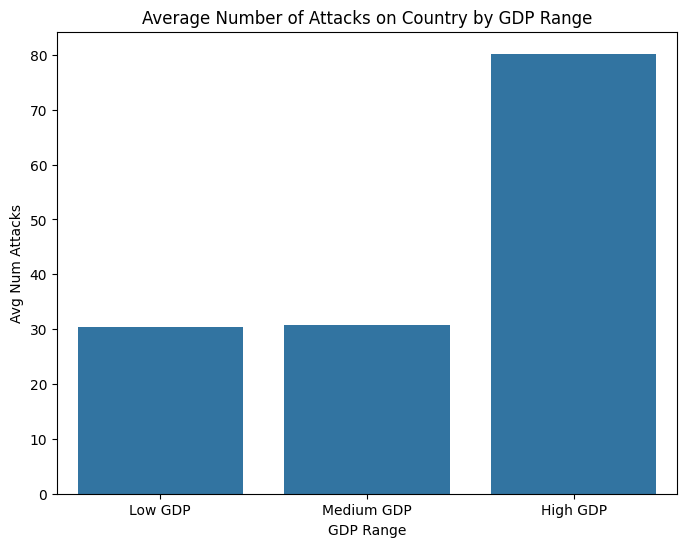

In [ ]:

plt.figure(figsize=(8,6))
plt.title("Average Number of Attacks on Country by GDP Range")
sns.barplot(data=gdp_range_comparison,x='GDP_Range',y='mean')
plt.xlabel('GDP Range')
plt.ylabel('Avg Num Attacks')

In [ ]:
actor_country_attacks = df.groupby('actor_country').size().reset_index(name='num_attacks')

In [ ]:
gdp_data = pip_data[['country_name','reporting_gdp']].groupby('country_name').mean().reset_index()

In [ ]:
merged_actor_data = actor_country_attacks.merge(gdp_data,left_on='actor_country',right_on='country_name',how='inner')

In [ ]:
merged_actor_data

actor_country  num_attacks          country_name  reporting_gdp
0                Albania            1               Albania    3727.032490
1                Algeria           21               Algeria    3328.657127
2                Armenia            1               Armenia    3048.224191
3              Australia            4             Australia   47296.931592
4                Austria            5               Austria   41568.699590
..                   ...          ...                   ...            ...
57                Uganda            2                Uganda     629.730562
58               Ukraine          133               Ukraine    2166.332489
59  United Arab Emirates            9  United Arab Emirates   40839.557720
60            Uzbekistan            4            Uzbekistan    1739.353116
61              Viet Nam           29              Viet Nam    2125.033402

[62 rows x 4 columns]

In [ ]:
merged_actor_data = merged_actor_data.drop(columns=['country_name'])

In [ ]:
merged_actor_data

actor_country  num_attacks  reporting_gdp
0                Albania            1    3727.032490
1                Algeria           21    3328.657127
2                Armenia            1    3048.224191
3              Australia            4   47296.931592
4                Austria            5   41568.699590
..                   ...          ...            ...
57                Uganda            2     629.730562
58               Ukraine          133    2166.332489
59  United Arab Emirates            9   40839.557720
60            Uzbekistan            4    1739.353116
61              Viet Nam           29    2125.033402

[62 rows x 3 columns]

In [ ]:
correlation,p_value = pearsonr(merged_actor_data['num_attacks'],merged_actor_data['reporting_gdp'])

In [ ]:
correlation

-0.06261666044911161

In [ ]:
p_value

0.6287513759965717

In [ ]:
pip_data.columns

Index(['region_name', 'region_code', 'country_name', 'country_code',
       'reporting_year', 'reporting_level', 'survey_acronym',
       'survey_coverage', 'survey_year', 'welfare_type',
       'survey_comparability', 'comparable_spell', 'poverty_line', 'headcount',
       'poverty_gap', 'poverty_severity', 'watts', 'mean', 'median', 'mld',
       'gini', 'polarization', 'decile1', 'decile2', 'decile3', 'decile4',
       'decile5', 'decile6', 'decile7', 'decile8', 'decile9', 'decile10',
       'cpi', 'ppp', 'reporting_pop', 'reporting_gdp', 'reporting_pce',
       'is_interpolated', 'distribution_type', 'estimation_type', 'spl', 'spr',
       'pg', 'estimate_type'],
      dtype='object')

In [ ]:
attacks_per_country = df.groupby('country').size().reset_index(name='num_attacks')

In [ ]:
gini_data = pip_data[['country_name','gini']].groupby('country_name').mean().reset_index()

In [ ]:
merged_cntry_data = attacks_per_country.merge(gini_data,left_on='country',right_on='country_name',how='inner')

In [ ]:
merged_cntry_data

country  num_attacks country_name      gini
0       Albania            9      Albania  0.322512
1       Algeria            2      Algeria  0.334343
2        Angola           32       Angola  0.486414
3     Argentina           36    Argentina  0.456511
4       Armenia           56      Armenia  0.321028
..          ...          ...          ...       ...
110  Uzbekistan            5   Uzbekistan  0.359525
111     Vanuatu            1      Vanuatu  0.348344
112    Viet Nam           21     Viet Nam  0.361377
113      Zambia            1       Zambia  0.519627
114    Zimbabwe            6     Zimbabwe  0.459157

[115 rows x 4 columns]

In [ ]:
merged_cntry_data = merged_cntry_data.drop(columns=['country_name'])
merged_cntry_data

country  num_attacks      gini
0       Albania            9  0.322512
1       Algeria            2  0.334343
2        Angola           32  0.486414
3     Argentina           36  0.456511
4       Armenia           56  0.321028
..          ...          ...       ...
110  Uzbekistan            5  0.359525
111     Vanuatu            1  0.348344
112    Viet Nam           21  0.361377
113      Zambia            1  0.519627
114    Zimbabwe            6  0.459157

[115 rows x 3 columns]

In [ ]:
correlation,p_value = pearsonr(merged_cntry_data['num_attacks'],merged_cntry_data['gini'])

In [ ]:
correlation

-0.15900735231856192

In [ ]:
p_value

0.08962996630597192

In [ ]:
median_gini = merged_cntry_data['gini'].median()
high_gini = merged_cntry_data[merged_cntry_data['gini'] > median_gini]['num_attacks']
low_gini = merged_cntry_data[merged_cntry_data['gini'] <= median_gini]['num_attacks']

In [ ]:
t_stat,p_value_ttest = ttest_ind(high_gini,low_gini,equal_var = False)

In [ ]:
t_stat

-2.4001862015216853

In [ ]:
p_value_ttest

0.018426755301003496

In [ ]:
gini_bins = pd.qcut(merged_cntry_data['gini'],q=3,labels=['Low Gini','Medium Gini','High Gini'])

In [ ]:
merged_cntry_data['Gini_Range'] = gini_bins

In [ ]:
gini_range_comparison = merged_cntry_data.groupby('Gini_Range')['num_attacks'].agg(['mean','count','std']).reset_index()

<ipython-input-322-93fbcbf19b46>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
gini_range_comparison

Gini_Range       mean  count         std
0     Low Gini  58.666667     39   96.769486
1  Medium Gini  63.657895     38  111.409951
2    High Gini  19.657895     38   30.229104

Text(0, 0.5, 'Avg Number of Attacks')

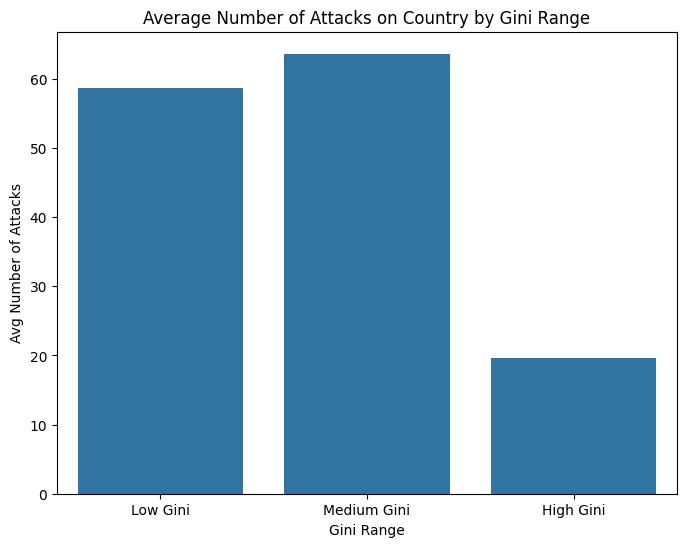

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Average Number of Attacks on Country by Gini Range")
sns.barplot(data=gini_range_comparison,x='Gini_Range',y='mean')
plt.xlabel('Gini Range')
plt.ylabel('Avg Number of Attacks')

In [ ]:
merged_actor_cntry_data = actor_country_attacks.merge(gini_data,left_on='actor_country',right_on='country_name',how='inner')

In [ ]:
merged_actor_cntry_data

actor_country  num_attacks          country_name      gini
0                Albania            1               Albania  0.322512
1                Algeria           21               Algeria  0.334343
2                Armenia            1               Armenia  0.321028
3              Australia            4             Australia  0.335056
4                Austria            5               Austria  0.301773
..                   ...          ...                   ...       ...
57                Uganda            2                Uganda  0.426597
58               Ukraine          133               Ukraine  0.276594
59  United Arab Emirates            9  United Arab Emirates  0.294547
60            Uzbekistan            4            Uzbekistan  0.359525
61              Viet Nam           29              Viet Nam  0.361377

[62 rows x 4 columns]

In [ ]:
merged_actor_cntry_data = merged_actor_cntry_data.drop(columns=['country_name'])

In [ ]:
merged_actor_cntry_data

actor_country  num_attacks      gini
0                Albania            1  0.322512
1                Algeria           21  0.334343
2                Armenia            1  0.321028
3              Australia            4  0.335056
4                Austria            5  0.301773
..                   ...          ...       ...
57                Uganda            2  0.426597
58               Ukraine          133  0.276594
59  United Arab Emirates            9  0.294547
60            Uzbekistan            4  0.359525
61              Viet Nam           29  0.361377

[62 rows x 3 columns]

In [ ]:
correlation,p_value = pearsonr(merged_actor_cntry_data['num_attacks'],merged_actor_cntry_data['gini'])

In [ ]:
correlation

0.006249364696562907

In [ ]:
p_value

0.9615516112558863

In [ ]:
median_gini = merged_actor_cntry_data['gini'].median()
high_gini = merged_actor_cntry_data[merged_actor_cntry_data['gini'] > median_gini]['num_attacks']
low_gini = merged_actor_cntry_data[merged_actor_cntry_data['gini'] <= median_gini]['num_attacks']

In [ ]:
t_stat,p_value_ttest = ttest_ind(high_gini,low_gini,equal_var = False)

In [ ]:
t_stat

0.7439424708537664

In [ ]:
p_value_ttest

0.4625324438624525

# Time Series

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/GoogColab/effectsBreach/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/GoogColab/effectsBreach/data


In [ ]:
df = pd.read_csv('mainData.csv', encoding='latin-1')
df['event_date'] = pd.to_datetime(df['event_date'], format='mixed')

df.set_index('event_date', inplace=True)
freq5Df = df.resample('5D').size().reset_index(name='count')
freq10Df = df.resample('10D').size().reset_index(name='count')
freq30Df = df.resample('30D').size().reset_index(name='count')
freq90Df = df.resample('90D').size().reset_index(name='count')

freq10Df.drop(freq10Df.tail(1).index,inplace=True)
freq5Df.drop(freq5Df.tail(1).index,inplace=True)
freq30Df.drop(freq30Df.tail(1).index,inplace=True)
freq90Df.drop(freq90Df.tail(1).index,inplace=True)

In [ ]:
freq5Df

event_date  count
0   2014-01-01     14
1   2014-01-06     14
2   2014-01-11     11
3   2014-01-16     22
4   2014-01-21     13
..         ...    ...
761 2024-06-02     18
762 2024-06-07     12
763 2024-06-12     13
764 2024-06-17     12
765 2024-06-22     11

[766 rows x 2 columns]

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.6 MB/s eta 0:00:00


In [ ]:
# Predictive Modeling
from pmdarima import auto_arima

data = freq5Df
data['event_date'] = pd.to_datetime(data['event_date'])
data = data.set_index('event_date')
data = data.resample('D').mean().interpolate()

train = data[:'2024-06-01']
test = data['2024-06-02':]

model = auto_arima(train['count'],seasonal=False,trace=True)

forecast = model.predict(n_periods=len(test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=24.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17517.912, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14797.408, Time=1.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15670.432, Time=2.93 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17515.912, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14692.906, Time=1.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=14540.729, Time=1.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=14299.321, Time=3.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=13859.165, Time=6.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=13385.718, Time=6.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=14186.223, Time=2.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=16.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=14129.375, Time=8.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(5,1,1)(0,0,0)[0]             : AIC=13383.718, Time=2.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(4,1,1)(0,0,0)[0]             : AIC=14184.223, Time=1.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(5,1,0)(0,0,0)[0]             : AIC=13857.165, Time=0.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(5,1,2)(0,0,0)[0]             : AIC=inf, Time=7.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(4,1,0)(0,0,0)[0]             : AIC=14297.321, Time=1.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(4,1,2)(0,0,0)[0]             : AIC=14127.380, Time=5.39 sec

Best model:  ARIMA(5,1,1)(0,0,0)[0]          
Total fit time: 95.499 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



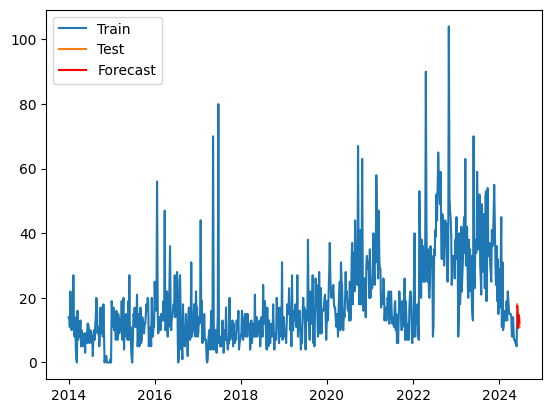

In [ ]:
# Predictive Modeling Visualisation
plt.plot(train.index,train['count'],label='Train')
plt.plot(test.index,test['count'],label='Test')
plt.plot(test.index,forecast,label='Forecast',color='red')
plt.legend()
plt.show()

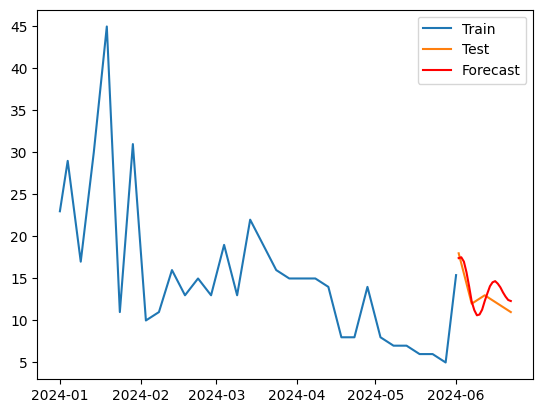

In [ ]:
# zoom in
train_filtered = train[train.index >= '2024']
test_filtered = test[test.index >= '2024']
forecast_filtered = forecast[test.index >= '2024']

plt.plot(train_filtered.index, train_filtered['count'], label='Train')
plt.plot(test_filtered.index, test_filtered['count'], label='Test')
plt.plot(test_filtered.index, forecast_filtered, label='Forecast', color='red')
plt.legend()
plt.show()


In [ ]:
# 10d
# Predictive Modeling
from pmdarima import auto_arima

data = freq10Df
data['event_date'] = pd.to_datetime(data['event_date'])
data = data.set_index('event_date')
data = data.resample('D').mean().interpolate()

train = data[:'2024-06-01']
test = data['2024-06-02':]

model = auto_arima(train['count'],seasonal=False,trace=True)

forecast = model.predict(n_periods=len(test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10185.709, Time=6.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15381.073, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10446.219, Time=0.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12584.496, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15379.074, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10411.147, Time=2.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10193.174, Time=8.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10427.992, Time=2.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10395.438, Time=4.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10187.151, Time=4.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=13.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,2)(0,0,0)[0]             : AIC=10183.713, Time=2.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,2)(0,0,0)[0]             : AIC=10409.147, Time=0.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(0,0,0)[0]             : AIC=10191.179, Time=1.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,2)(0,0,0)[0]             : AIC=inf, Time=8.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=5.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10425.992, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,3)(0,0,0)[0]             : AIC=10393.438, Time=0.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(0,0,0)[0]             : AIC=10185.154, Time=6.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=6.47 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 97.570 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



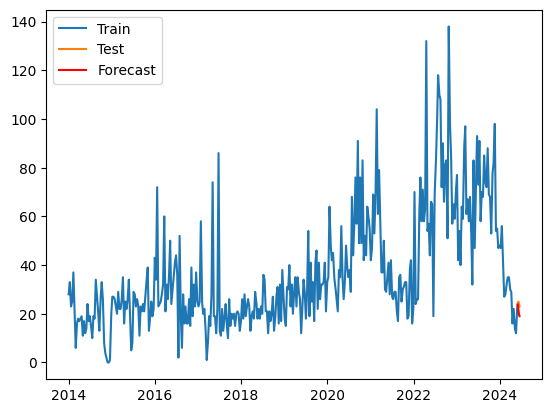

In [ ]:
# Predictive Modeling Visualisation
plt.plot(train.index,train['count'],label='Train')
plt.plot(test.index,test['count'],label='Test')
plt.plot(test.index,forecast,label='Forecast',color='red')
plt.legend()
plt.show()

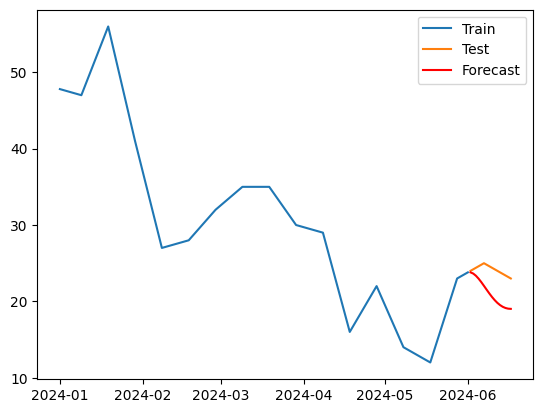

In [ ]:
# zoom in
train_filtered = train[train.index >= '2024']
test_filtered = test[test.index >= '2024']
forecast_filtered = forecast[test.index >= '2024']

plt.plot(train_filtered.index, train_filtered['count'], label='Train')
plt.plot(test_filtered.index, test_filtered['count'], label='Test')
plt.plot(test_filtered.index, forecast_filtered, label='Forecast', color='red')
plt.legend()
plt.show()


In [ ]:
freq30Df
sorted = freq30Df.sort_values(by='count')
sorted

event_date  count
11  2014-11-27      1
10  2014-10-28     14
39  2017-03-16     28
2   2014-03-02     40
4   2014-05-01     40
..         ...    ...
101 2022-04-19    243
87  2021-02-23    244
105 2022-08-17    270
107 2022-10-16    288
104 2022-07-18    324

[127 rows x 2 columns]

In [ ]:
# 30
# Predictive Modeling
from pmdarima import auto_arima

data = freq30Df
data['event_date'] = pd.to_datetime(data['event_date'])
data = data.set_index('event_date')
data = data.resample('D').mean().interpolate()

train = data[:'2024-06-01']
test = data['2024-06-02':]

model = auto_arima(train['count'],seasonal=False,trace=True)

forecast = model.predict(n_periods=len(test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3400.490, Time=11.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12642.913, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3451.304, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8883.094, Time=1.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12641.109, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3451.513, Time=1.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3400.372, Time=10.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3451.402, Time=1.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3451.310, Time=0.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3395.547, Time=7.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3451.223, Time=1.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3396.215, Time=11.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3451.033, Time=1.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=18.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(0,0,0)[0]             : AIC=3452.913, Time=1.22 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0] intercept
Total fit time: 81.926 seconds


ValueError: Prediction must have `end` after `start`.

In [ ]:
# Predictive Modeling Visualisation
plt.plot(train.index,train['count'],label='Train')
plt.plot(test.index,test['count'],label='Test')
plt.plot(test.index,forecast,label='Forecast',color='red')
plt.legend()
plt.show()

In [ ]:
from pmdarima import auto_arima
import pandas as pd


data = freq30Df
data['event_date'] = pd.to_datetime(data['event_date'])
data = data.set_index('event_date')
data = data.resample('D').mean().interpolate()


train = data[:'2024-06-01']


model = auto_arima(train['count'], seasonal=False, trace=True)


last_date = train.index[-1]
forecast_end_date = '2025-06-30'
n_days_to_forecast = (pd.to_datetime(forecast_end_date) - last_date).days


forecast = model.predict(n_periods=n_days_to_forecast)


forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_days_to_forecast)
forecast_df = pd.DataFrame({'forecast': forecast}, index=forecast_dates)


forecast_combined = pd.concat([data, forecast_df])

print(forecast_combined)


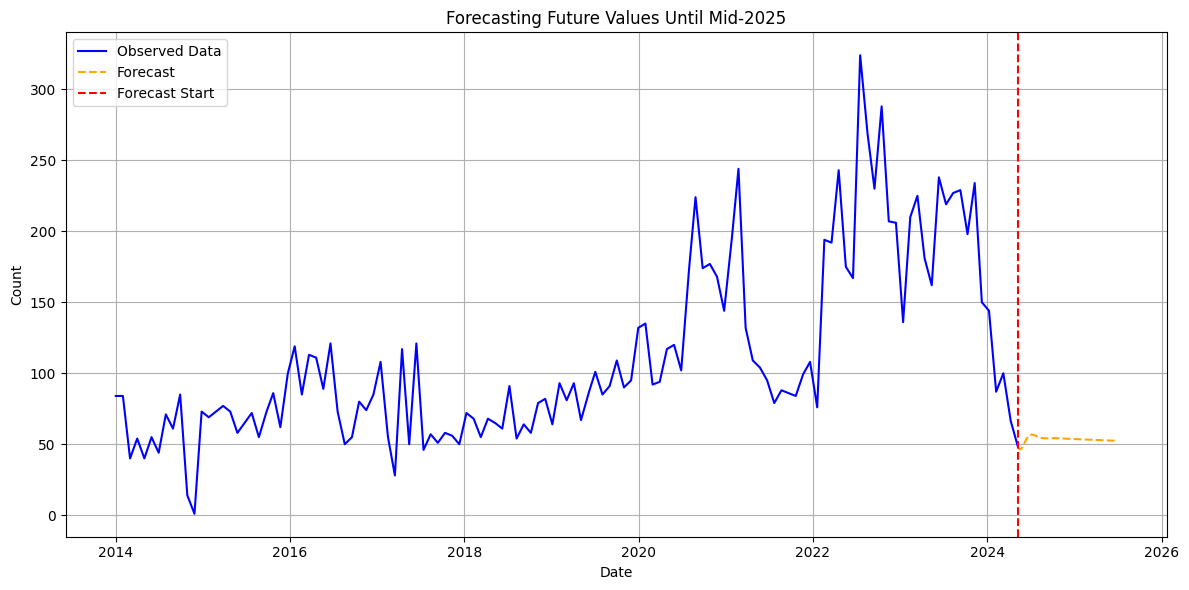

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['count'], label='Observed Data', color='blue')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast', color='orange', linestyle='--')
plt.axvline(x=last_date, color='red', linestyle='--', label='Forecast Start')
plt.title('Forecasting Future Values Until Mid-2025')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# 90

In [ ]:
predictions_df = pd.DataFrame({
    'Date': test.index,
    'Actual': test['count'],
    'Predicted': forecast
}).reset_index(drop=True)

predictions_df

Date  Actual  Predicted
0  2024-06-02    18.0  17.424330
1  2024-06-03    16.8  17.525260
2  2024-06-04    15.6  17.006144
3  2024-06-05    14.4  15.736428
4  2024-06-06    13.2  14.066781
5  2024-06-07    12.0  12.253817
6  2024-06-08    12.2  11.231080
7  2024-06-09    12.4  10.617567
8  2024-06-10    12.6  10.709185
9  2024-06-11    12.8  11.287533
10 2024-06-12    13.0  12.318319
11 2024-06-13    12.8  13.224925
12 2024-06-14    12.6  14.077166
13 2024-06-15    12.4  14.544291
14 2024-06-16    12.2  14.683053
15 2024-06-17    12.0  14.386364
16 2024-06-18    11.8  13.947040
17 2024-06-19    11.6  13.343241
18 2024-06-20    11.4  12.835358
19 2024-06-21    11.2  12.440574
20 2024-06-22    11.0  12.316769

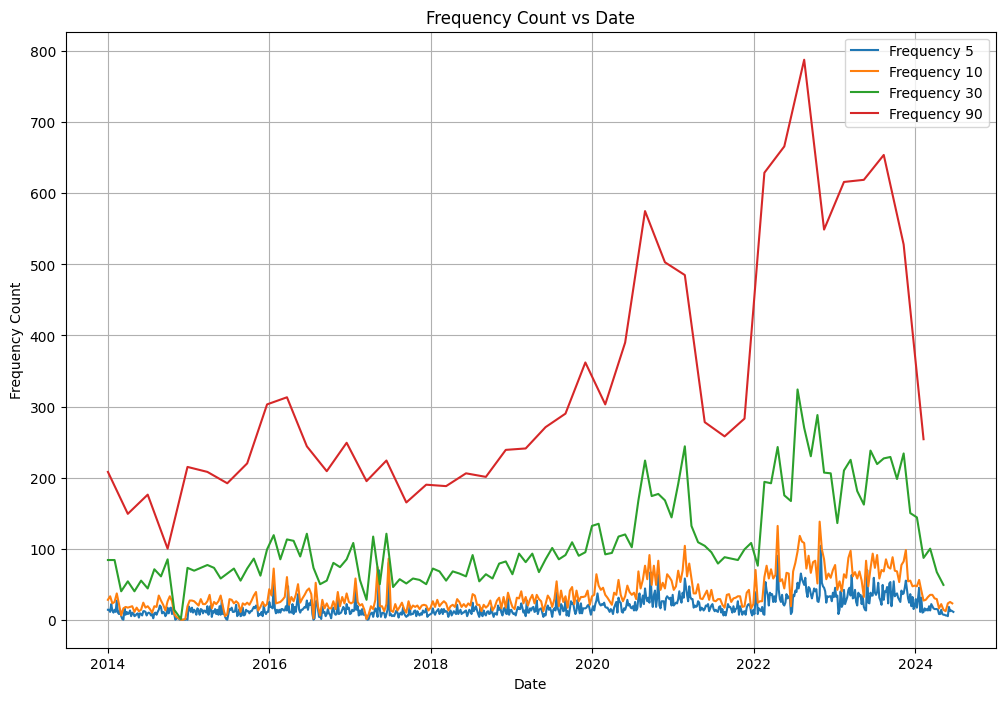

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(freq5Df["event_date"], freq5Df["count"], label="Frequency 5")
plt.plot(freq10Df["event_date"], freq10Df["count"], label="Frequency 10")
plt.plot(freq30Df["event_date"], freq30Df["count"], label="Frequency 30")
plt.plot(freq90Df["event_date"], freq90Df["count"], label="Frequency 90")
plt.xlabel("Date")
plt.ylabel("Frequency Count")
plt.title("Frequency Count vs Date")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
s30.values

NameError: name 's30' is not defined

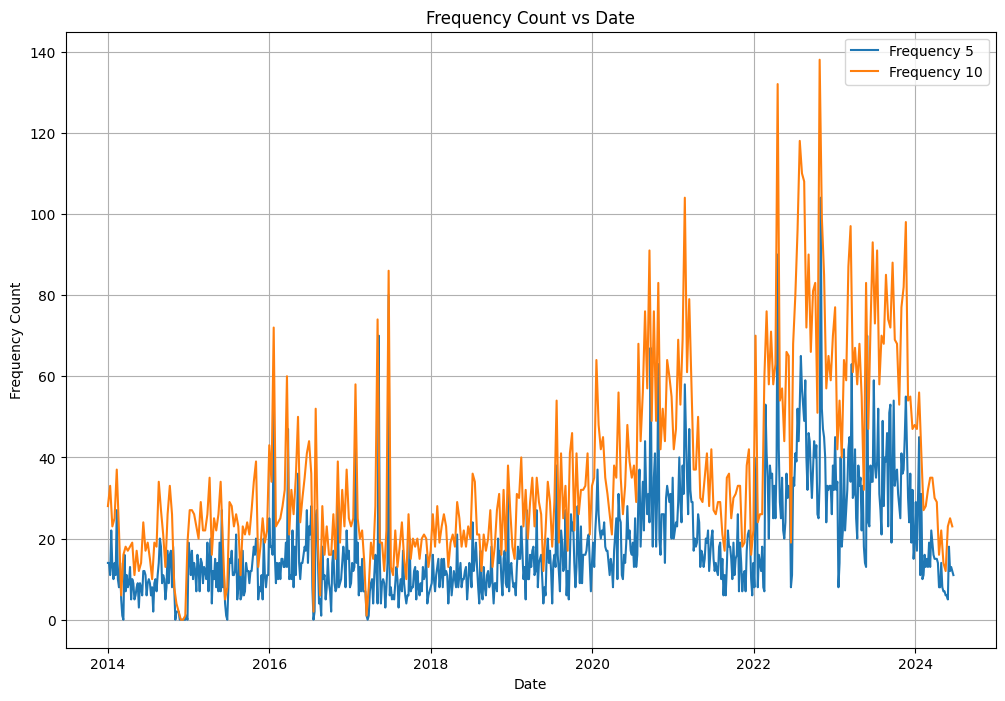

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(freq5Df["event_date"], freq5Df["count"], label="Frequency 5")
plt.plot(freq10Df["event_date"], freq10Df["count"], label="Frequency 10")
plt.xlabel("Date")
plt.ylabel("Frequency Count")
plt.title("Frequency Count vs Date")
plt.legend()
plt.grid(True)
plt.show()

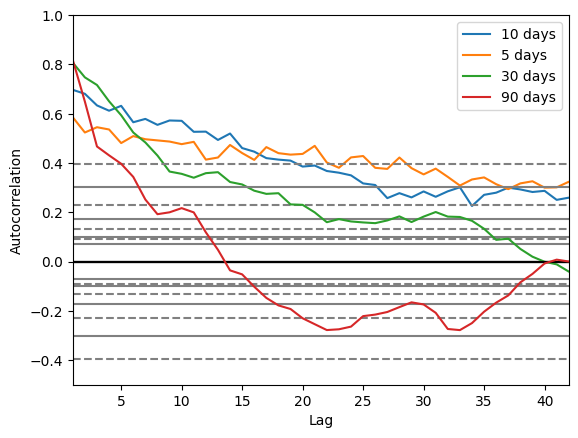

In [ ]:
from pandas import read_csv
import pandas
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(freq10Df['count'], label = '10 days')
autocorrelation_plot(freq5Df['count'], label = '5 days')
autocorrelation_plot(freq30Df['count'], label = '30 days')
autocorrelation_plot(freq90Df['count'], label = '90 days')
plt.ylim(-0.5, 1.0)
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                  383
Model:                 ARIMA(3, 1, 4)   Log Likelihood                 310.457
Date:                Sun, 26 Jan 2025   AIC                           -604.914
Time:                        17:36:40   BIC                           -573.351
Sample:                    01-01-2014   HQIC                          -592.392
                         - 06-17-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1967      0.289     -4.136      0.000      -1.764      -0.630
ar.L2          0.0419      0.515      0.081      0.935      -0.968       1.052
ar.L3          0.5392      0.283      1.905      0.0

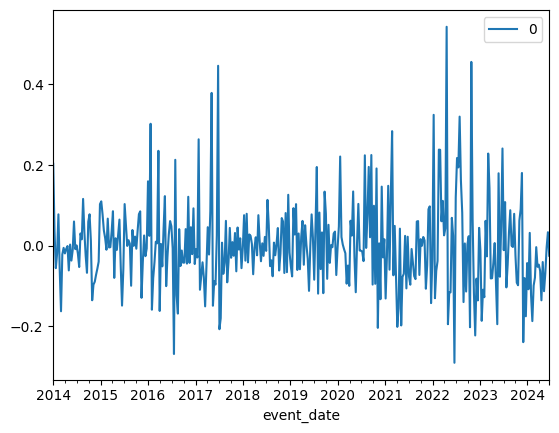

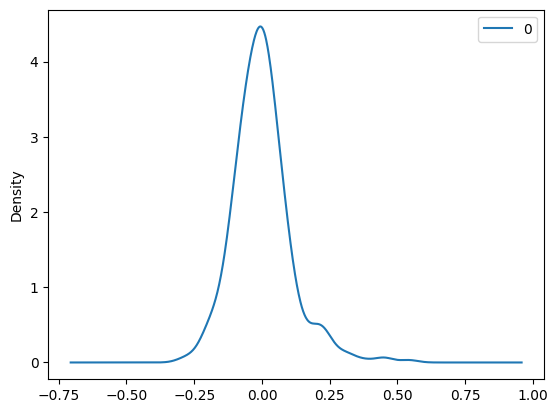

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
## arima on 10day period
s10 = freq10Df.set_index('event_date')
s10['count'] = (s10['count'] - s10['count'].min()) / (s10['count'].max() - s10['count'].min())
model = ARIMA(s10, order=(3,1,4))
model_fit = model.fit()
print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

residuals.plot(kind='kde')
pyplot.show()




/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-14-ac29567a6d00>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=0.402610, expected=0.318841


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.376604, expected=0.463768


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.414495, expected=0.434783


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.422551, expected=0.398551


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.395629, expected=0.304348


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.376681, expected=0.340580


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.390519, expected=0.500000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.407933, expected=0.384058


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.399229, expected=0.500000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.411652, expected=0.753623


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.473540, expected=0.442029


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.477604, expected=0.572464


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.461480, expected=0.420290


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.468586, expected=0.268116


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.450158, expected=0.268116


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.370367, expected=0.362319


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.385024, expected=0.217391


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.393762, expected=0.210145


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.321059, expected=0.253623


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.290275, expected=0.297101


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.353493, expected=0.202899


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.297096, expected=0.304348


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.282097, expected=0.195652


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.289658, expected=0.188406


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.277557, expected=0.210145


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.249935, expected=0.210145


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.226492, expected=0.152174


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.212436, expected=0.123188


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.206692, expected=0.253623


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.225145, expected=0.260870


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.226175, expected=0.181159


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.194605, expected=0.217391


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.214543, expected=0.224638


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.237568, expected=0.239130


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.232833, expected=0.239130


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.218154, expected=0.130435


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.180667, expected=0.137681


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.196577, expected=0.275362


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.233404, expected=0.304348


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.238588, expected=0.115942


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.188269, expected=0.159420


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.169967, expected=0.507246


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.299889, expected=0.173913


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.266094, expected=0.188406


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.185195, expected=0.188406


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.200909, expected=0.434783


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.300011, expected=0.550725


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.364242, expected=0.420290


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.312313, expected=0.514493


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.340531, expected=0.420290


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.412270, expected=0.456522


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.456535, expected=0.956522


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.597287, expected=0.391304


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.463514, expected=0.413043


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.442981, expected=0.318841


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.483318, expected=0.478261


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.498065, expected=0.471014


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.449006, expected=0.137681


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.303348, expected=0.492754


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.419586, expected=0.579710


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.517682, expected=0.695652


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.521366, expected=0.855072


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.523430, expected=0.797101


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.649304, expected=0.782609


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.697385, expected=0.521739


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.631842, expected=0.652174


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.621079, expected=0.478261


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.581818, expected=0.586957


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.576917, expected=0.601449


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.578506, expected=0.369565


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.510258, expected=1.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.642791, expected=0.717391


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.707872, expected=0.615942


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.639956, expected=0.413043


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.589784, expected=0.471014


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.530641, expected=0.427536


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.517467, expected=0.507246


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.519154, expected=0.557971


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.550965, expected=0.304348


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.481542, expected=0.391304


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.445100, expected=0.289855


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.423331, expected=0.463768
predicted=0.438582, expected=0.427536


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.439180, expected=0.630435


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.510502, expected=0.702899


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.532390, expected=0.442029


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.553048, expected=0.485507


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.469874, expected=0.420290


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.494681, expected=0.492754


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.484823, expected=0.398551


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.440746, expected=0.231884


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.399619, expected=0.601449


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.422013, expected=0.340580


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.472312, expected=0.521739


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.443652, expected=0.673913


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.522679, expected=0.528986


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.548804, expected=0.659420


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.517537, expected=0.420290


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.555730, expected=0.507246


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.465870, expected=0.492754


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.526377, expected=0.615942


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.531613, expected=0.536232
predicted=0.519289, expected=0.521739


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.558665, expected=0.637681
predicted=0.509995, expected=0.500000
predicted=0.586034, expected=0.492754
predicted=0.481611, expected=0.384058


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.497799, expected=0.557971


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.498082, expected=0.594203


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.517976, expected=0.710145


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.618528, expected=0.391304


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.490232, expected=0.398551


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.525702, expected=0.340580


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.398436, expected=0.347826


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.456578, expected=0.340580


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.383718, expected=0.405797


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.422863, expected=0.297101


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.397328, expected=0.195652


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.314176, expected=0.202899


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.320259, expected=0.231884


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.266092, expected=0.253623


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.313401, expected=0.253623


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.273166, expected=0.217391


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.278468, expected=0.210145


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.260362, expected=0.115942


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.203830, expected=0.159420


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.219950, expected=0.101449


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.155780, expected=0.086957


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.173441, expected=0.166667


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.145492, expected=0.181159


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.187811, expected=0.166667
Test RMSE: 0.139


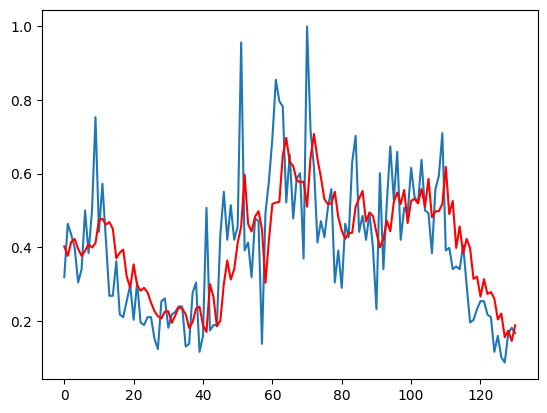

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
X = s10.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,4))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

auto_model = auto_arima(
    s10,
    seasonal=False,           # Set to True if seasonal component is suspected
    trace=True,               # Prints model details
    error_action='ignore',    # Ignores convergence errors
    suppress_warnings=True,   # Suppresses warnings
    stepwise=True             # Stepwise search for faster computation
)
print(f"Selected ARIMA order: {auto_model.order}")
print("Fitting the ARIMA model...")
model = ARIMA(s10, order=auto_model.order)
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-597.579, Time=3.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-458.656, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-553.579, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-602.734, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-460.656, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-601.565, Time=1.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-601.404, Time=1.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-599.112, Time=1.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-604.731, Time=0.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-603.564, Time=0.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-603.402, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-555.578, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-601.110, Time=0.47 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 11.030 seconds
Selected ARIMA order: (0, 1, 1)
Fitting the ARIMA model...
                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                  383
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 304.366
Date:                Sun, 26 Jan 2025   AIC                           -604.731
Time:                        17:39:45   BIC                           -596.841
Sample:                    01-01-2014   HQIC                          -601.601
                         - 06-17-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10D will be used.
  self._init_dates(dates, freq)


<ipython-input-17-b213420c8708>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=0.414202, expected=0.318841
predicted=0.398833, expected=0.463768
predicted=0.408935, expected=0.434783
predicted=0.413017, expected=0.398551
predicted=0.410736, expected=0.304348
predicted=0.394369, expected=0.340580
predicted=0.386222, expected=0.500000
predicted=0.403382, expected=0.384058
predicted=0.400464, expected=0.500000
predicted=0.415511, expected=0.753623
predicted=0.469967, expected=0.442029
predicted=0.464813, expected=0.572464
predicted=0.484106, expected=0.420290
predicted=0.472613, expected=0.268116
predicted=0.439866, expected=0.268116
predicted=0.414337, expected=0.362319
predicted=0.406457, expected=0.217391
predicted=0.376330, expected=0.210145
predicted=0.344811, expected=0.253623
predicted=0.324530, expected=0.297101
predicted=0.318318, expected=0.202899
predicted=0.292212, expected=0.304348
predicted=0.295000, expected=0.195652
predicted=0.273065, expected=0.188406
predicted=0.253661, expected=0.210145
predicted=0.243545, expected=0.210145
predicted=0.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.208367, expected=0.260870
predicted=0.220141, expected=0.181159
predicted=0.211542, expected=0.217391


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.212836, expected=0.224638
predicted=0.215432, expected=0.239130
predicted=0.220621, expected=0.239130
predicted=0.224664, expected=0.130435
predicted=0.204097, expected=0.137681
predicted=0.189423, expected=0.275362
predicted=0.208347, expected=0.304348
predicted=0.229141, expected=0.115942
predicted=0.204731, expected=0.159420
predicted=0.194963, expected=0.507246
predicted=0.260784, expected=0.173913
predicted=0.242154, expected=0.188406
predicted=0.231085, expected=0.188406
predicted=0.222369, expected=0.434783
predicted=0.265574, expected=0.550725
predicted=0.328390, expected=0.420290
predicted=0.351613, expected=0.514493
predicted=0.394758, expected=0.420290
predicted=0.401748, expected=0.456522
predicted=0.416269, expected=0.956522
predicted=0.572242, expected=0.391304
predicted=0.513584, expected=0.413043
predicted=0.486695, expected=0.318841
predicted=0.445334, expected=0.478261
predicted=0.453220, expected=0.471014
predicted=0.457488, expected=0.137681
predicted=0.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.407515, expected=0.405797
predicted=0.407066, expected=0.297101
predicted=0.378360, expected=0.195652
predicted=0.328951, expected=0.202899
predicted=0.293166, expected=0.231884
predicted=0.275501, expected=0.253623
predicted=0.269265, expected=0.253623
predicted=0.264866, expected=0.217391
predicted=0.251587, expected=0.210145
predicted=0.239972, expected=0.115942
predicted=0.204909, expected=0.159420
predicted=0.191854, expected=0.101449


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.165775, expected=0.086957
predicted=0.142760, expected=0.166667
predicted=0.149730, expected=0.181159
predicted=0.158756, expected=0.166667
Test RMSE: 0.141


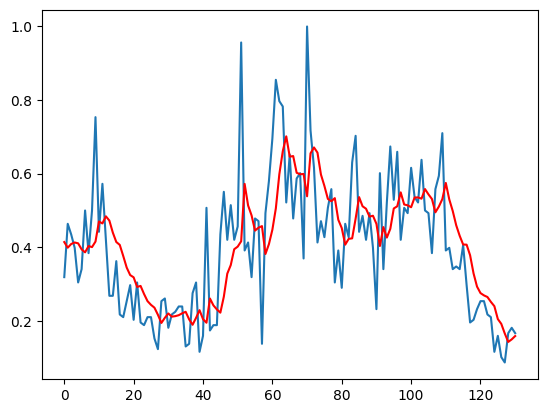

In [ ]:
X = s10.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test, label = 'data')
pyplot.plot(predictions, color='red', label = 'predictions')
pyplot.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=201.694, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=209.546, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=207.437, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=207.198, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=205.072, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=205.049, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=200.841, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=199.957, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=201.077, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=201.461, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=209.329, Time=0.02 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=201.658, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=202.055, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=197.079, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=198.461, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=199.392, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=199.029, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=199.048, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=204.180, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=200.536, Time=0.23 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=198.678, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=200.350, Time=0.42 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept
Total fit time: 2.788 seconds
Test RMSE 1.123388723800862


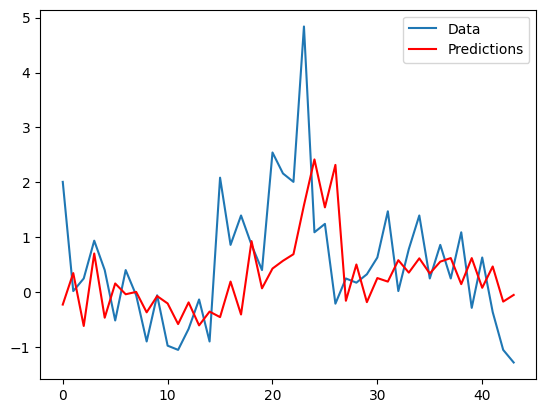

In [ ]:
# Updated
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from pmdarima import auto_arima
from matplotlib import pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1)).flatten()

size = int(len(X_scaled) * 0.66)
train,test = X_scaled[0:size], X_scaled[size:]

auto_model = auto_arima(train,seasonal=False,trace=True)
order = auto_model.order

history = [x for x in train]
predictions = []

for t in range(len(test)):
  model = ARIMA(history,order=order)
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)


rmse = sqrt(mean_squared_error(test,predictions))
print('Test RMSE',rmse)

plt.plot(test,label='Data')
plt.plot(predictions,color='red',label='Predictions')
plt.legend()
plt.show()

In [ ]:
s10

count
event_date          
2014-01-01  0.202899
2014-01-11  0.239130
2014-01-21  0.166667
2014-01-31  0.181159
2014-02-10  0.268116
...              ...
2024-05-08  0.101449
2024-05-18  0.086957
2024-05-28  0.166667
2024-06-07  0.181159
2024-06-17  0.166667

[383 rows x 1 columns]

In [ ]:
s30 = freq30Df.set_index('event_date')
s30['count'] = (s30['count'] - s30['count'].min()) / (s30['count'].max() - s30['count'].min())

In [ ]:

auto_model = auto_arima(
    s30,
    seasonal=True,           # Set to True if seasonal component is suspected
    trace=True,               # Prints model details
    error_action='ignore',    # Ignores convergence errors
    suppress_warnings=True,   # Suppresses warnings
    stepwise=True             # Stepwise search for faster computation
)
print(f"Selected ARIMA order: {auto_model.order}")
print("Fitting the ARIMA model...")
model = ARIMA(s30, order=auto_model.order)
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-188.584, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-173.570, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-187.724, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.832, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-175.563, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-190.832, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-190.832, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-189.340, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-194.829, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-192.829, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-192.829, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-189.714, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-191.339, Time=0.20 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.387 seconds
Selected ARIMA order: (0, 1, 1)
Fitting the ARIMA model...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                  127
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  99.414
Date:                Sun, 26 Jan 2025   AIC                           -194.829
Time:                        17:41:00   BIC                           -189.156
Sample:                    01-01-2014   HQIC                          -192.524
                         - 05-08-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4300      0.070     -6.142      0.000      -0.567      -0.293
sigma2         0.0121      0.001     11.209      0.000       0.010       0.014
Ljung-Box (L1) (Q):                   0.00   Jarque-

predicted=0.515692, expected=0.544892
predicted=0.528488, expected=0.517028


<ipython-input-21-90f037755fd9>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=0.523873, expected=0.442724
predicted=0.493965, expected=0.588235
predicted=0.527567, expected=0.752322
predicted=0.614299, expected=0.405573
predicted=0.535646, expected=0.334365
predicted=0.470555, expected=0.318885
predicted=0.412382, expected=0.291022
predicted=0.356400, expected=0.241486
predicted=0.300129, expected=0.269350
predicted=0.285131, expected=0.263158
predicted=0.274838, expected=0.256966
predicted=0.266587, expected=0.303406
predicted=0.283350, expected=0.331269
predicted=0.304973, expected=0.232198
predicted=0.272321, expected=0.597523
predicted=0.412664, expected=0.591331
predicted=0.509562, expected=0.749226
predicted=0.655749, expected=0.538700
predicted=0.587238, expected=0.513932
predicted=0.548714, expected=1.000000
predicted=0.779579, expected=0.832817
predicted=0.810811, expected=0.708978
predicted=0.756730, expected=0.888545
predicted=0.824269, expected=0.637771
predicted=0.730627, expected=0.634675
predicted=0.682186, expected=0.417957
predicted=0.

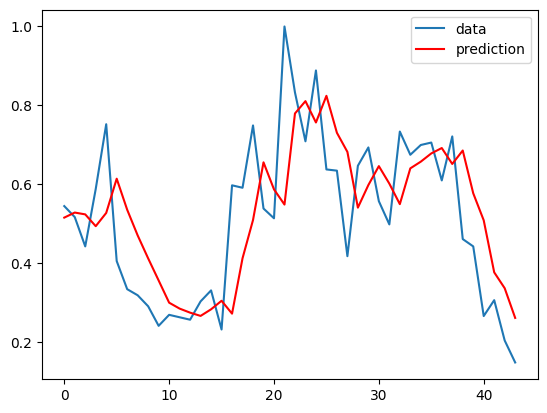

In [ ]:
X = s30.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test, label = 'data')
pyplot.plot(predictions, color='red', label = 'prediction')
pyplot.legend()
pyplot.show()

<ipython-input-22-7560da6aae05>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=0.498258, expected=0.544892
predicted=0.525756, expected=0.517028
predicted=0.520277, expected=0.442724
predicted=0.485433, expected=0.588235
predicted=0.532102, expected=0.752322
predicted=0.616166, expected=0.405573
predicted=0.517217, expected=0.334365
predicted=0.491032, expected=0.318885
predicted=0.422187, expected=0.291022
predicted=0.372098, expected=0.241486
predicted=0.312307, expected=0.269350
predicted=0.296906, expected=0.263158
predicted=0.277404, expected=0.256966
predicted=0.267575, expected=0.303406
predicted=0.287522, expected=0.331269
predicted=0.305475, expected=0.232198
predicted=0.264073, expected=0.597523
predicted=0.427989, expected=0.591331
predicted=0.482845, expected=0.749226
predicted=0.628036, expected=0.538700
predicted=0.542661, expected=0.513932
predicted=0.493072, expected=1.000000
predicted=0.793264, expected=0.832817
predicted=0.759793, expected=0.708978


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.779999, expected=0.888545
predicted=0.852441, expected=0.637771
predicted=0.705864, expected=0.634675
predicted=0.712682, expected=0.417957
predicted=0.525151, expected=0.647059
predicted=0.606240, expected=0.693498
predicted=0.623872, expected=0.557276
predicted=0.593248, expected=0.498452
predicted=0.561070, expected=0.733746
predicted=0.650250, expected=0.674923
predicted=0.631328, expected=0.699690
predicted=0.688297, expected=0.705882
predicted=0.695061, expected=0.609907
predicted=0.651486, expected=0.721362
predicted=0.698274, expected=0.461300
predicted=0.562376, expected=0.442724
predicted=0.527249, expected=0.266254
predicted=0.366082, expected=0.306502
predicted=0.337118, expected=0.204334
predicted=0.245180, expected=0.148607
Test RMSE: 0.158


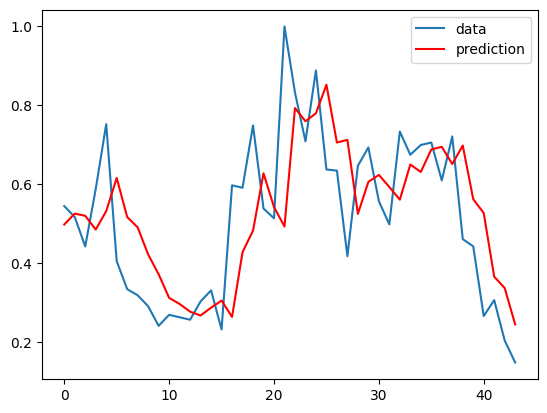

In [ ]:
X = s30.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test, label = 'data')
pyplot.plot(predictions, color='red', label = 'prediction')
pyplot.legend()
pyplot.show()

In [ ]:
s90 = freq90Df.set_index('event_date')
s90['count'] = (s90['count'] - s90['count'].min()) / (s90['count'].max() - s90['count'].min())

In [ ]:

auto_model = auto_arima(
    s90,
    seasonal=True,           # Set to True if seasonal component is suspected
    trace=True,               # Prints model details
    error_action='ignore',    # Ignores convergence errors
    suppress_warnings=True,   # Suppresses warnings
    stepwise=True             # Stepwise search for faster computation
)
print(f"Selected ARIMA order: {auto_model.order}")
print("Fitting the ARIMA model...")
model = ARIMA(s90, order=auto_model.order)
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-34.194, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-34.959, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-32.960, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-32.960, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-36.954, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-32.316, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.683 seconds
Selected ARIMA order: (0, 1, 0)
Fitting the ARIMA model...
                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                   42
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  19.477
Date:                Sun, 26 Jan 2025   AIC                            -36.954
Time:                        17:41:17   BIC                            -35.240
Sample:                    01-01-2014   HQIC                           -36.330
                         - 02-08-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2   

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 90D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 90D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 90D will be used.
  self._init_dates(dates, freq)


predicted=0.421512, expected=0.690407
predicted=0.690407, expected=0.585756
predicted=0.585756, expected=0.559593
predicted=0.559593, expected=0.258721
predicted=0.258721, expected=0.229651
predicted=0.229651, expected=0.265988
predicted=0.265988, expected=0.768895
predicted=0.768895, expected=0.822674


<ipython-input-25-8d50c717096a>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.822674, expected=1.000000
predicted=1.000000, expected=0.652616
predicted=0.652616, expected=0.750000
predicted=0.750000, expected=0.754360
predicted=0.754360, expected=0.805233
predicted=0.805233, expected=0.622093
predicted=0.622093, expected=0.223837
Test RMSE: 0.229


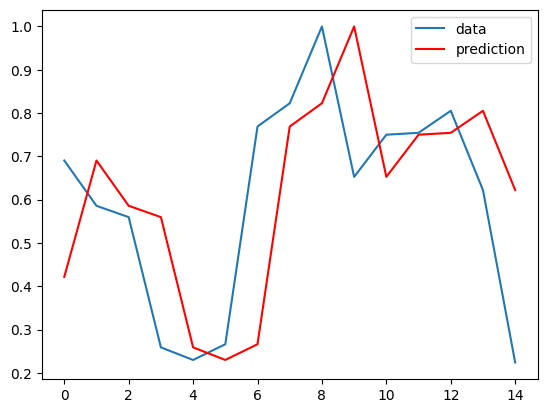

In [ ]:
X = s90.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test, label = 'data')
pyplot.plot(predictions, color='red', label = 'prediction')
pyplot.legend()
pyplot.show()

# Public Administration

In [ ]:
df_public_admin = df[df['industry'] == 'Public Administration']

In [ ]:
PAfreq10Df = df_public_admin.resample('10D').size().reset_index(name='count')
PAfreq30Df = df_public_admin.resample('30D').size().reset_index(name='count')

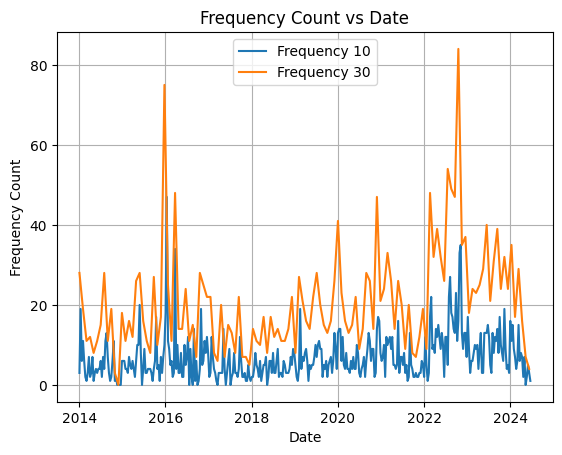

In [ ]:
plt.plot(PAfreq10Df["event_date"], PAfreq10Df["count"], label="Frequency 10")
plt.plot(PAfreq30Df["event_date"], PAfreq30Df["count"], label="Frequency 30")
plt.xlabel("Date")
plt.ylabel("Frequency Count")
plt.title("Frequency Count vs Date")
plt.legend()
plt.grid(True)
plt.show()

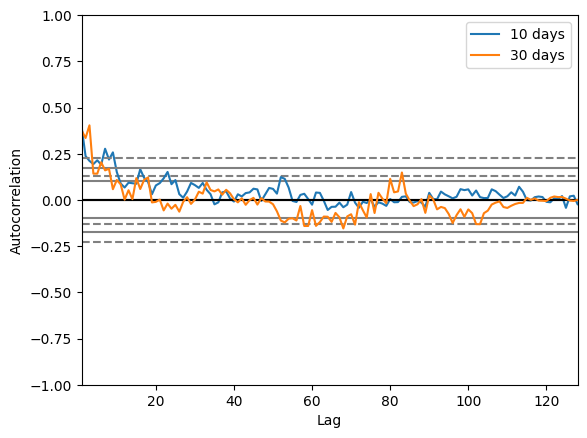

In [ ]:
from pandas import read_csv
import pandas
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(PAfreq10Df['count'], label = '10 days')
autocorrelation_plot(PAfreq30Df['count'], label = '30 days')
plt.legend()
plt.show()

In [ ]:
PAs10 = PAfreq10Df.set_index('event_date')
PAs10['count'] = (PAs10['count'] - PAs10['count'].min()) / (PAs10['count'].max() - PAs10['count'].min())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-597.288, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-454.323, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-508.378, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-589.052, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-456.322, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-596.952, Time=0.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-598.674, Time=0.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-600.514, Time=0.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-600.509, Time=0.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-538.410, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-602.514, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-591.029, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-510.373, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-600.674, Time=0.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-598.940, Time=0.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-602.508, Time=0.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-540.402, Time=0.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-602.141, Time=1.94 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 8.729 seconds
Selected ARIMA order: (1, 1, 1)
Fitting the ARIMA model...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                  383
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 304.257
Date:                Sun, 26 Jan 2025   AIC                           -602.514
Time:                        17:41:27   BIC                           -590.677
Sample:                    01-03-2014   HQIC                          -597.818
                         - 06-19-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2353      0.042      5.549      0.000       0.152       0.318
ma.L1         -0.9130      0.023    -39.912      0.000      -0.958      -0.868
sigma2         0.0119      0.000     29.760      0.0

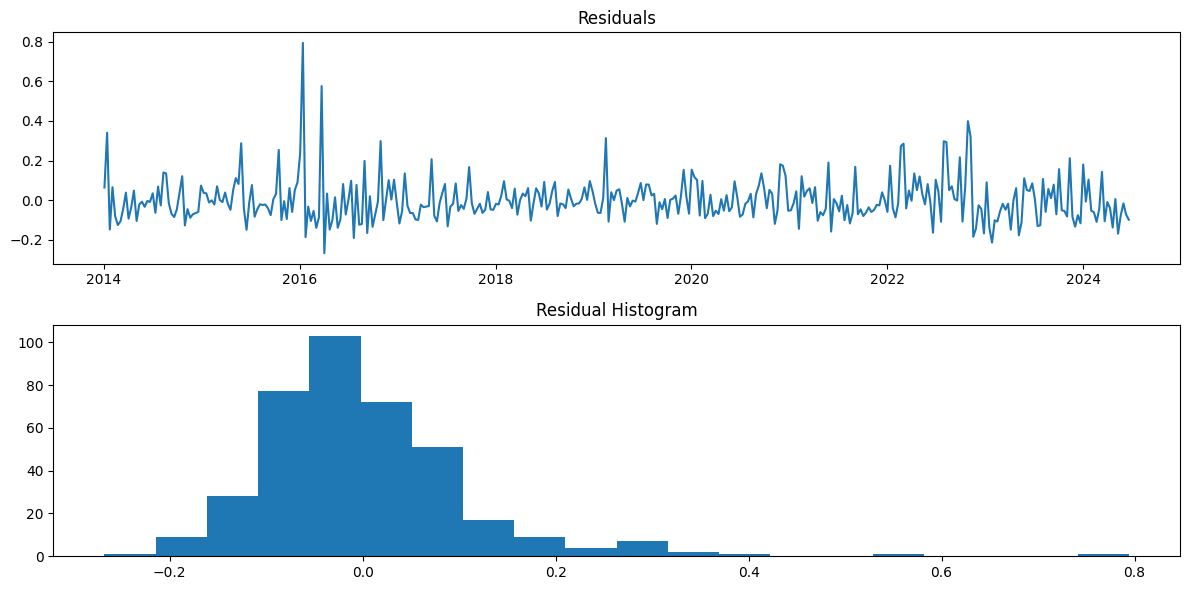

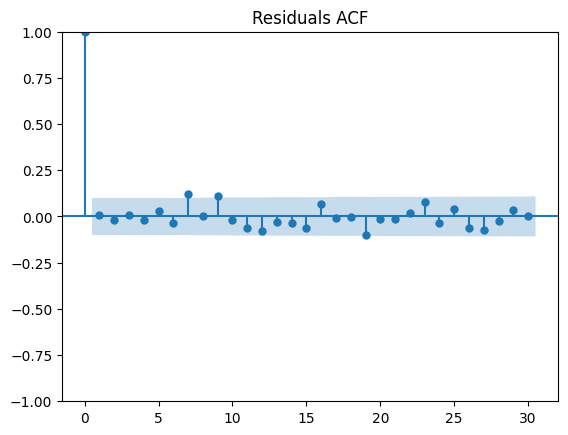

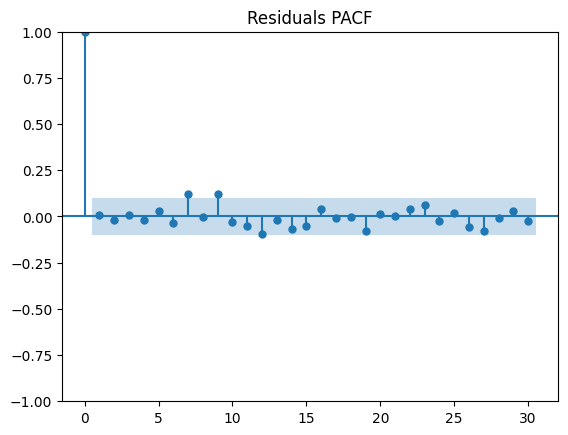

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

auto_model = auto_arima(
    PAs10,
    seasonal=True,           # Set to True if seasonal component is suspected
    trace=True,               # Prints model details
    error_action='ignore',    # Ignores convergence errors
    suppress_warnings=True,   # Suppresses warnings
    stepwise=True             # Stepwise search for faster computation
)
print(f"Selected ARIMA order: {auto_model.order}")
print("Fitting the ARIMA model...")
model = ARIMA(PAs10, order=auto_model.order)
model_fit = model.fit()
print(model_fit.summary())

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title("Residuals")
plt.subplot(212)
plt.hist(residuals, bins=20)
plt.title("Residual Histogram")
plt.tight_layout()
plt.show()


plot_acf(residuals, lags=30)
plt.title("Residuals ACF")
plt.show()

plot_pacf(residuals, lags=30)
plt.title("Residuals PACF")
plt.show()

<ipython-input-32-f5aac864a7c6>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=0.118502, expected=0.297872
predicted=0.171554, expected=0.361702
predicted=0.193516, expected=0.340426
predicted=0.197552, expected=0.170213
predicted=0.159969, expected=0.127660
predicted=0.149194, expected=0.148936
predicted=0.153687, expected=0.212766
predicted=0.170152, expected=0.042553
predicted=0.127951, expected=0.255319
predicted=0.178391, expected=0.212766
predicted=0.171431, expected=0.234043
predicted=0.178901, expected=0.255319
predicted=0.187261, expected=0.191489
predicted=0.174522, expected=0.255319
predicted=0.191931, expected=0.106383
predicted=0.157169, expected=0.106383
predicted=0.154249, expected=0.085106
predicted=0.146187, expected=0.106383
predicted=0.148618, expected=0.340426
predicted=0.205320, expected=0.063830
predicted=0.143588, expected=0.148936
predicted=0.160500, expected=0.148936
predicted=0.159975, expected=0.106383
predicted=0.149239, expected=0.170213
predicted=0.162697, expected=0.063830
predicted=0.137642, expected=0.106383
predicted=0.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.197949, expected=0.255319
predicted=0.185564, expected=0.191489
predicted=0.170730, expected=0.276596
predicted=0.196273, expected=0.212766
predicted=0.182312, expected=0.042553
predicted=0.134404, expected=0.255319
predicted=0.190643, expected=0.255319
predicted=0.194112, expected=0.106383
predicted=0.155394, expected=0.468085
predicted=0.252433, expected=0.574468
predicted=0.305404, expected=0.382979
predicted=0.271045, expected=0.361702
predicted=0.277129, expected=0.297872
predicted=0.265461, expected=0.276596
predicted=0.262106, expected=0.489362
predicted=0.334556, expected=0.234043
predicted=0.269839, expected=0.340426
predicted=0.300155, expected=0.702128
predicted=0.417308, expected=0.744681
predicted=0.478352, expected=0.276596
predicted=0.352683, expected=0.191489
predicted=0.309640, expected=0.276596
predicted=0.323635, expected=0.276596
predicted=0.318214, expected=0.148936
predicted=0.270951, expected=0.361702
predicted=0.328727, expected=0.191489
predicted=0.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.244508, expected=0.234043
predicted=0.217323, expected=0.319149
predicted=0.245925, expected=0.191489
predicted=0.210241, expected=0.148936
predicted=0.195343, expected=0.085106
predicted=0.171487, expected=0.127660
predicted=0.178818, expected=0.319149
predicted=0.236903, expected=0.127660
predicted=0.181425, expected=0.170213
predicted=0.190995, expected=0.148936
predicted=0.182665, expected=0.042553
predicted=0.146012, expected=0.148936
predicted=0.172097, expected=0.000000
predicted=0.121887, expected=0.042553
predicted=0.124901, expected=0.106383
predicted=0.138516, expected=0.063830
predicted=0.121148, expected=0.021277
Test RMSE: 0.118


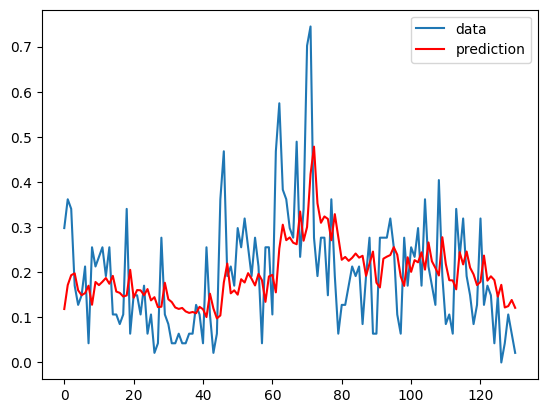

In [ ]:
X = PAs10.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test, label = 'data')
pyplot.plot(predictions, color='red', label = 'prediction')
pyplot.legend()
pyplot.show()

In [ ]:
PAs30 = PAfreq30Df.set_index('event_date')
PAs30['count'] = (PAs30['count'] - PAs30['count'].min()) / (PAs30['count'].max() - PAs30['count'].min())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-125.066, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-80.262, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-109.663, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-127.888, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-82.241, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-125.956, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-125.948, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-129.880, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-127.953, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-127.944, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-111.621, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.30 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.083 seconds
Selected ARIMA order: (0, 1, 1)
Fitting the ARIMA model...
                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                  128
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  66.940
Date:                Sun, 26 Jan 2025   AIC                           -129.880
Time:                        17:42:05   BIC                           -124.192
Sample:                    01-03-2014   HQIC                          -127.569
                         - 06-09-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1        

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 30D will be used.
  self._init_dates(dates, freq)


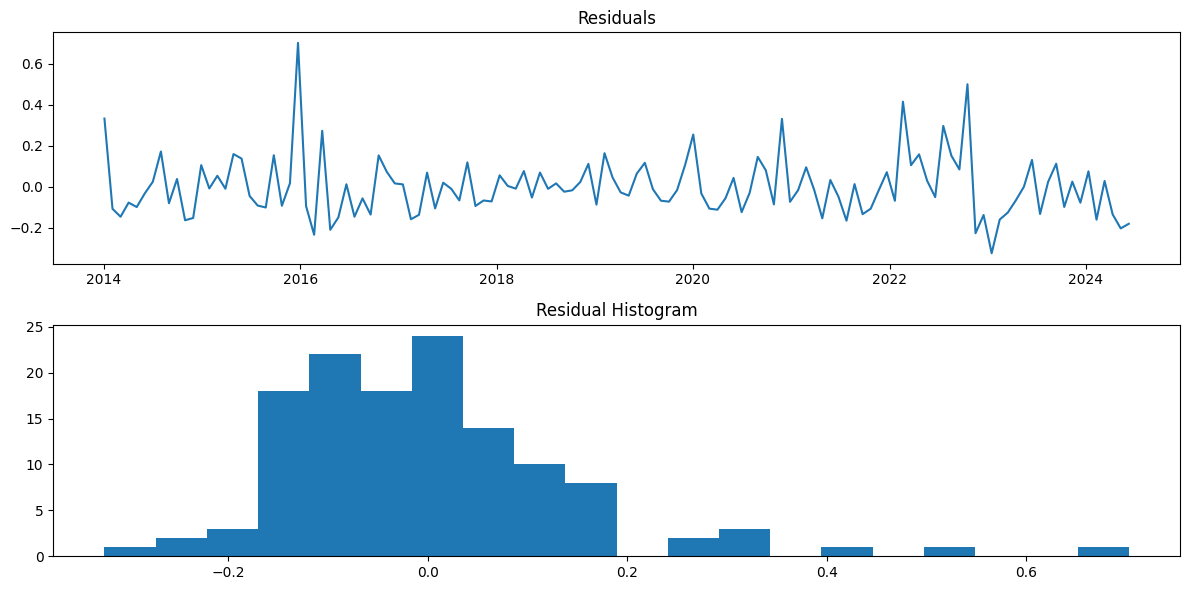

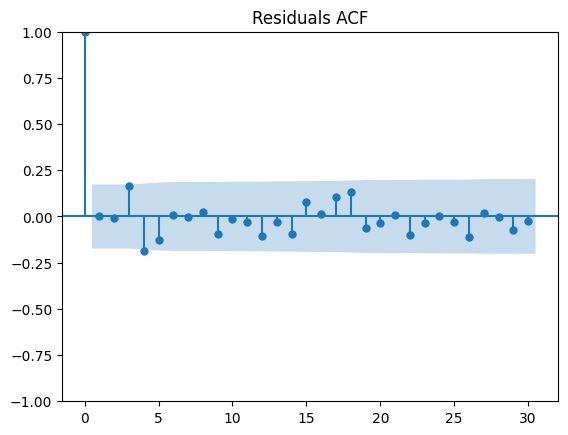

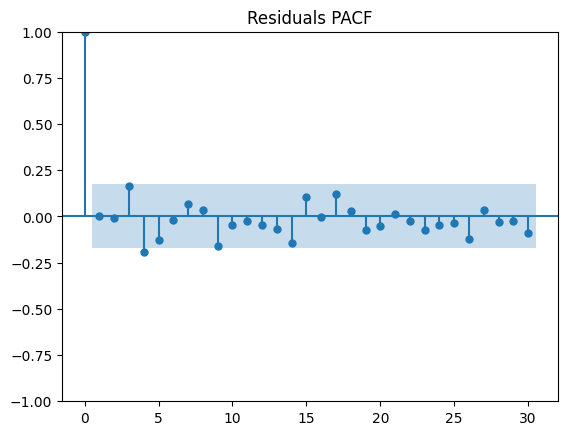

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

auto_model = auto_arima(
    PAs30,
    seasonal=True,           # Set to True if seasonal component is suspected
    trace=True,               # Prints model details
    error_action='ignore',    # Ignores convergence errors
    suppress_warnings=True,   # Suppresses warnings
    stepwise=True             # Stepwise search for faster computation
)
print(f"Selected ARIMA order: {auto_model.order}")
print("Fitting the ARIMA model...")
model = ARIMA(PAs30, order=auto_model.order)
model_fit = model.fit()
print(model_fit.summary())

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title("Residuals")
plt.subplot(212)
plt.hist(residuals, bins=20)
plt.title("Residual Histogram")
plt.tight_layout()
plt.show()


plot_acf(residuals, lags=30)
plt.title("Residuals ACF")
plt.show()

plot_pacf(residuals, lags=30)
plt.title("Residuals PACF")
plt.show()

<ipython-input-35-4af219ab353d>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=0.226287, expected=0.559524
predicted=0.268721, expected=0.250000
predicted=0.265642, expected=0.285714
predicted=0.268595, expected=0.392857
predicted=0.287667, expected=0.309524
predicted=0.291215, expected=0.166667
predicted=0.272335, expected=0.309524
predicted=0.277343, expected=0.238095
predicted=0.272046, expected=0.107143
predicted=0.251582, expected=0.238095
predicted=0.249985, expected=0.095238
predicted=0.231372, expected=0.083333
predicted=0.210309, expected=0.142857
predicted=0.198628, expected=0.226190
predicted=0.203482, expected=0.107143
predicted=0.187410, expected=0.571429
predicted=0.239378, expected=0.380952
predicted=0.254197, expected=0.464286
predicted=0.281769, expected=0.380952
predicted=0.299757, expected=0.309524
predicted=0.301574, expected=0.642857
predicted=0.378334, expected=0.583333
predicted=0.443162, expected=0.559524
predicted=0.481211, expected=1.000000
predicted=0.664079, expected=0.416667
predicted=0.570896, expected=0.440476
predicted=0.

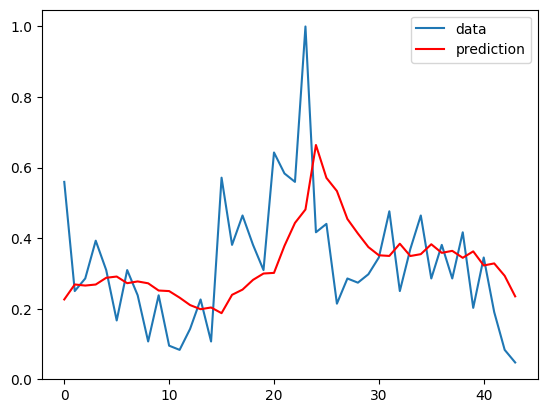

In [ ]:
X = PAs30.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test, label = 'data')
pyplot.plot(predictions, color='red', label = 'prediction')
pyplot.legend()
pyplot.show()